# Capstone Project: The Efficacy of Multilayer Perceptron Algorithms in Predicting Bankruptcy

## Table of Contents

<ul>
<li><a href="#introduction">INTRODUCTION</a></li>
<li><a href="#feature">The Feature Variables</a></li>
<li><a href="#import1">Import Data</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#target">Separation of Target Variables</a></li>
<li><a href="#no nulls">No Nulls Data</a></li>
<li><a href="#one-hot null">Creation of One-hot Null Variable</a></li>
<li><a href="#Creation of Sum Null Variables">Creation of Sum Null Variables</a></li>
<li><a href="#PIVOT">PIVOT</a></li>
<li><a href="#Data Reorganization">Data Reorganization</a></li>
<li><a href="#Data Exploration - Descriptive Statistics">Data Exploration - Descriptive Statistics</a></li>
<li><a href="#Exploratory Visualization">Exploratory Visualization</a></li>
<li><a href="#Preprocessing">Preprocessing</a></li>
<li><a href="#Benchmark: Logistic Regression">Benchmark: Logistic Regression</a></li>
<li><a href="#originalMLP">Origial MLP</a></li>
<li><a href="#conclusion">Conclusion</a></li> 
<li><a href="#references">References</a></li>
</ul>

Benchmark: Logistic Regression

<a id='introduction'></a>
## INTRODUCTION

There is some research to suggest that machine learning can identify which companies are financially sound (Reference 7). Bjorn Mattsson tested gradient boosting (GB), random forest (RF), and multilayer perceptron (MLP) machine learning algorithms on a dataset of Polish companies from 2007 to 2012 (Reference 7). 64 different financial features were used to predict the binary target variable, bankruptcy (Reference 7). Out of the three algorithms, the GB algorithm was best able to predict whether a company declared bankruptcy (Reference 7).

The original problem to be solved in this analysis was whether the MLP algorithm can be modified to perform better. Mattsson et al found that the RF and GB algorithms consistently outperformed the MLP algorithm (Reference 7). While Mattsson et al modified some of their hyperparameters, their MLP algorithm included weight decay in the activation function and they applied dropout to their hidden layer nodes, it is unclear whether they modified the hyperparameters beyond these measures (Reference 7). The original results of Mattson et al’s MLP model would serve as a benchmark, and this analysis would seek to improve the performance of the MLP by modifying parameters, e.g. the number of hidden layers and nodes, and the hyperparameters, e.g. the activation functions and the loss optimizers.

However, upon further inspection of the dataset, Mattsson et al pre-processed the data incorrectly. Mattson et al broke down the dataset into five distinct datasets, a dataset for each of the five years (Reference 7; Reference 17). They then created three different versions of the data for each year: the first had no null values in the data, while the second and third had null values (Reference 7). Furthermore, version one had no feature variables regarding null values, version two had dummy variables created for each x feature, signaling whether a given value in the x feature was null, and version three had a null counter variable that counted the number of null values in a given row of data (Reference 7).  They then split the data for each year and each version of the data. The error that Mattson et al overlooked was that the second and fourth year datasets contained rows that contained at least one null value (see Appendices B and C). They probably imputed values for the nulls in the second and fourth years, which one cannot do in a dataset that has at least one null value in each row. If every row has at least one null value, then it is impossible to create a testing set without imputing values into it, which would introduce data leakage, model information outside the scope of the training set, into the testing set (Reference 18; Reference 19). Data leakages lead to overly optimistic models, and avoiding obvious sources of data leakages, such as imputing values into the testing data, is common practice in building machine learning models (Reference 18; Reference 19). The violation of this practice necessitates that a different methodology from Mattson et al’s be used.

The new problem this analysis addresses is given that Mattson et al’s models are probably overly optimistic due to data leakage, how well should an MLP model, not corrupted by imputed values in the testing data, perform in predicting bankruptcy? Also, along with a new methodology that protects the model from data leakage, this analysis will also need a new benchmark for performance.
Initially, this analysis sought to use Mattsson et al’s methodology and make adjustments to the MLP algorithm to determine whether such adjustments could be made to improve its ability to predict bankruptcy. However, upon discovering that Mattsson et al’s models are probably overly optimistic in the “Drop Nulls” section (see above for the section link Table of Contents), this analysis pivots and adopts a new methodology and new benchmark model. More on the pivot of the analysis can be found in the “PIVOT” section (see above for the section link in Table of Contents) where it describes the new methodology and benchmark.


<a id='feature'></a>
## The Feature Variables
Below is a snapshot of the feature variables in this analysis:

Attribute Information:
1. X1 net profit / total assets
2. X2 total liabilities / total assets
3. X3 working capital / total assets
4. X4 current assets / short-term liabilities
5. X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
6. X6 retained earnings / total assets
7. X7 EBIT / total assets
8. X8 book value of equity / total liabilities
9. X9 sales / total assets
10. X10 equity / total assets
11. X11 (gross profit + extraordinary items + financial expenses) / total assets
12. X12 gross profit / short-term liabilities
13. X13 (gross profit + depreciation) / sales
14. X14 (gross profit + interest) / total assets
15. X15 (total liabilities * 365) / (gross profit + depreciation)
16. X16 (gross profit + depreciation) / total liabilities
17. X17 total assets / total liabilities
18. X18 gross profit / total assets
19. X19 gross profit / sales
20. X20 (inventory * 365) / sales
21. X21 sales (n) / sales (n-1)
22. X22 profit on operating activities / total assets
23. X23 net profit / sales
24. X24 gross profit (in 3 years) / total assets
25. X25 (equity - share capital) / total assets
26. X26 (net profit + depreciation) / total liabilities
27. X27 profit on operating activities / financial expenses
28. X28 working capital / fixed assets
29. X29 logarithm of total assets
30. X30 (total liabilities - cash) / sales
31. X31 (gross profit + interest) / sales
32. X32 (current liabilities * 365) / cost of products sold
33. X33 operating expenses / short-term liabilities
34. X34 operating expenses / total liabilities
35. X35 profit on sales / total assets
36. X36 total sales / total assets
37. X37 (current assets - inventories) / long-term liabilities
38. X38 constant capital / total assets
39. X39 profit on sales / sales
40. X40 (current assets - inventory - receivables) / short-term liabilities
41. X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
42. X42 profit on operating activities / sales
43. X43 rotation receivables + inventory turnover in days
44. X44 (receivables * 365) / sales
45. X45 net profit / inventory
46. X46 (current assets - inventory) / short-term liabilities
47. X47 (inventory * 365) / cost of products sold
48. X48 EBITDA (profit on operating activities - depreciation) / total assets
49. X49 EBITDA (profit on operating activities - depreciation) / sales
50. X50 current assets / total liabilities
51. X51 short-term liabilities / total assets
52. X52 (short-term liabilities * 365) / cost of products sold)
53. X53 equity / fixed assets
54. X54 constant capital / fixed assets
55. X55 working capital
56. X56 (sales - cost of products sold) / sales
57. X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
58. X58 total costs /total sales
59. X59 long-term liabilities / equity
60. X60 sales / inventory
61. X61 sales / receivables
62. X62 (short-term liabilities *365) / sales
63. X63 sales / short-term liabilities
64. X64 sales / fixed assets


This  comes from Reference 7 of the References Section.

<a id='import1'></a>
## Import Data
This section imports the csv files to pandas dataframes.

In [1]:
# This imports the libraries needed to upload the 
# csv.files.
import os
import numpy as np
import pandas as pd

# This checks the current working directory.
os.getcwd()

'C:\\Users\\bgcam\\Desktop\\udacity-capstone'

In [2]:
# This changes the working directory in order to 
# upload the csv files.

new_path = "data"
os.chdir(new_path)

# This confirms that the current working directory
# was changed to new_path.
os.getcwd()

'C:\\Users\\bgcam\\Desktop\\udacity-capstone\\data'

In [3]:
# This converts the csv files to pandas dataframes
# for each of the five years.
year_one_df = pd.read_csv("1year.csv")
year_two_df = pd.read_csv("2year.csv")
year_three_df = pd.read_csv("3year.csv")
year_four_df = pd.read_csv("4year.csv")
year_five_df = pd.read_csv("5year.csv")

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='assess'></a>
## Data Assessment
This section identifies tidiness and quality issues that need to be cleaned for each dataframe from the five years.


### Assessment: year_one_df

In [4]:
# This tells us the number of rows
# and columns in year_one_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_one_df.shape))

The number of rows and columns (rows, columns) are: (7027, 65).


**Visual Assessment**

In [5]:
# This eliminates the "max_columns" and 
# "max_rows" in visual displays of dataframes.
# This comes from Reference 1.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# This returns a visual assessment of year_one_df.
# This comes from Reference 2.
year_one_df.sample(20)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
2705,0.2057,0.14164,0.26914,5.1353,434.87,0.24856,0.22171,6.0602,0.26146,0.85836,0.2349,3.4065,0.933150,0.22171,211.89,1.7226,7.0602,0.22171,0.847960,134.1900,1.5043,0.075004,0.786760,0.38461,0.8495,1.6096,5.6853,0.40425,5.7351,0.541730,0.847960,177.27,2.7215,1.2505,0.12745,0.26146,5.6145,0.90077,0.487460,0.58461,0.048534,0.286870,413.4700,279.280,2.1401,3.6584,198.08,0.052731,0.201680,2.3597,0.065084,0.36745,1.2893,1.353,5.1353,0.487460,0,0.411810,0.049407,2.7201,1.3069,90.8590,4.0172,0.39271,0
775,0.073918,0.25913,0.24718,2.0093,-4.6583,0,0.099613,2.859,1.4839,0.74087,0.11898,0.40675,0.119140,0.099613,535.01,0.68223,3.859,0.099613,0.067130,63.7060,1.1113,0.11818,0.049814,0.18139,0.68256,0.58307,6.1015,0.48664,4.8363,0.161010,0.072398,66.194,5.5141,5.2113,0.13347,1.4839,100.46,0.74319,0.089950,0.10156,0.044216,0.079642,114.9200,51.215,0.28541,0.95175,70.003,0.041005,0.027634,1.8989,0.2449,0.18135,1.4586,1.4632,16957.0000,0.089950,0.099772,0.932980,0.003132,5.7294,7.1268,60.2400,6.0591,2.9215,0
1757,0.3702,0.11884,0.74507,7.2696,69.707,0,0.3702,7.4147,1.9448,0.88116,0.37658,3.1151,0.206480,0.3702,108.02,3.379,8.4147,0.3702,0.190350,58.1740,?,0.37444,0.190350,0.3702,0.83221,3.379,58.677,5.4748,3.332,-0.013659,0.190400,27.61,13.22,13.22,0.37373,1.9448,?,0.88116,0.192170,2.3761,0.009762,0.192530,109.1400,50.969,1.1943,4.6613,72.013,0.34308,0.176410,7.2696,0.11884,0.075643,6.4748,6.4748,1600.3000,0.192170,0.42013,0.810780,0,6.2743,7.1613,22.3040,16.365,14.29,0
1672,0.056076,0.82348,-0.026471,0.96758,-56.841,-0.26501,0.074617,0.21436,3.4557,0.17652,0.24521,0.091398,0.034985,0.074617,2486.1,0.14682,1.2144,0.074617,0.021592,49.9710,0.9357,0.24491,0.016227,0.16284,-0.20894,0.1243,1.4356,-0.12601,4.6235,0.238220,0.029323,92.786,3.9338,3.8999,0.24423,3.4557,?,0.17652,0.070675,0.000526,0.094266,0.070870,83.3870,33.416,0.11852,0.38805,53.772,0.19863,0.057477,0.95925,0.81639,0.25421,0.84027,0.84027,-1112.5000,0.070675,0.31767,0.978450,0,7.3042,10.923,86.2290,4.2329,16.45,0
4872,0.1686,0.67421,0.029812,1.1114,-62.158,0,0.19252,0.48321,1.0344,0.32579,0.20294,0.71942,0.186120,0.19252,1278.2,0.28555,1.4832,0.19252,0.186120,21.6910,?,0.1296,0.163000,0.19252,0.24655,0.25008,12.437,0.042433,3.8792,0.636370,0.193740,134.73,2.7496,1.0914,0.13856,1.0344,0.58028,0.7324,0.133960,0.072598,0.1734,0.125300,98.0940,76.403,2.7428,0.8817,30.493,0.1296,0.125300,0.44113,0.2676,0.36369,0.4637,1.0424,225.7300,0.299130,0.51752,0.721430,1.2481,16.827,4.7773,94.4300,3.8653,1.4722,0
5846,0.03489,0.50643,0.030922,1.0902,-95.554,0.19076,0.039433,0.93047,1.0554,0.47121,0.039433,0.11509,0.122930,0.039433,1893.9,0.19273,1.9746,0.039433,0.049667,93.1290,1.0177,0.0284,0.043945,0.19804,0.47121,0.18375,0.37752,0.04936,5.1484,0.628120,0.049667,166.24,2.1956,0.056079,0.0284,0.82456,1.0439,0.63501,0.035770,0.059295,0.19233,0.035770,162.3900,69.264,0.17223,0.49902,98.287,-0.029768,-0.037494,0.73763,0.34263,0.45546,0.7522,1.0137,4351.5000,0.052481,0.074043,0.947520,0.3476,3.9193,5.2697,157.5200,2.3172,1.2674,0
5093,0.50583,0.57124,0.055942,1.0979,-1.6919,0.42217,0.50583,0.75018,1.0208,0.42854,0.50583,0.88549,0.024239,0.50583,330.57,1.1042,1.7506,0.50583,0.019438,2.4569,1.1261,0.50616,0.019438,0.42217,0.42854,1.1042,0.19855,0.15005,3.0746,0.011636,0.019438,8.179,44.626,0.88606,0.50616,26.044,?,0.42854,0.019451,0.46993,0.02976,0.019451,5.0319,2.575,2.8878,0.7913,2.5079,0.38124,0.014650,1.0979,0.57124,0.022408,1.1494,1.1494,66.4300,0.020364,1.1804,0.979640,0,148.56,141.75,8.0125,45.554,69.798,0
5828,0.061996,0.36549,0.58869,2.6107,42.955,0.2514

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21" and "attr37" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [6]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
Attr1     7027 non-null object
Attr2     7027 non-null object
Attr3     7027 non-null object
Attr4     7027 non-null object
Attr5     7027 non-null object
Attr6     7027 non-null object
Attr7     7027 non-null object
Attr8     7027 non-null object
Attr9     7027 non-null object
Attr10    7027 non-null object
Attr11    7027 non-null object
Attr12    7027 non-null object
Attr13    7027 non-null float64
Attr14    7027 non-null object
Attr15    7027 non-null object
Attr16    7027 non-null object
Attr17    7027 non-null object
Attr18    7027 non-null object
Attr19    7027 non-null float64
Attr20    7027 non-null float64
Attr21    7027 non-null object
Attr22    7027 non-null object
Attr23    7027 non-null float64
Attr24    7027 non-null object
Attr25    7027 non-null object
Attr26    7027 non-null object
Attr27    7027 non-null object
Attr28    7027 non-null object
Attr29    7027 non-nu

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [7]:
# This is a query to determine whether there are
# duplicated rows in year_one_df.
# This comes from Reference 3.
yr_one_duplicated = year_one_df[year_one_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_one_duplicated.shape[0]))

Number of duplicates: 82


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 82 duplicates that need to be removed.

### Issues: year_one_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr21" and "attr37" and possibly other feature variables have null values in the form of "?".
>> 2. "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.
>> 3. There are 82 duplicates that need to be removed.

### Assessment: year_two_df

In [8]:
# This tells us the number of rows
# and columns in year_two_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_two_df.shape))

The number of rows and columns (rows, columns) are: (10173, 65).


**Visual Assessment**

In [9]:
# This returns a visual assessment of year_two_df.
# This comes from Reference 2.
year_two_df.sample(20)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
2542,0.00088152,0.69825,-0.011619,0.97679,-50.693,0,0.0012857,0.43215,1.751,0.30175,0.045306,0.0025687,0.030571,0.0012857,4761.2,0.076661,1.4321,0.0012857,0.00073429,44.977,1.0405,0.045021,0.00050344,0.15767,0.28579,0.076082,1.0227,-0.022733,4.5529,0.37562,0.013814,106.86,3.4158,2.4486,0.041279,1.751,2.0693,0.43375,0.023575,0.093004,0.2393,0.025712,92.212,47.235,0.0040855,0.54572,46.063,-0.0072215,-0.0041242,0.7002,0.50053,0.29276,0.5904,0.84868,-414.97,0.023575,0.0029214,0.99927,0.43746,8.1152,7.7273,104.34,3.4983,3.426,0
3400,-0.042804,0.7214,0.31633,1.6232,-205.68,0.18278,-0.042804,0.3862,0.83484,0.2786,-0.031635,-0.084323,0.036466,-0.042804,8649.2,0.0422,1.3862,-0.042804,-0.051272,125.36,?,-0.048565,-0.051272,-0.042804,0.013139,0.0422,-4.3481,1.7967,3.0735,0.86411,-0.051272,209.71,1.7405,1.2247,-0.048638,0.83484,2.5129,0.49239,-0.05826,0.97025,0.97425,-0.058172,144.9,19.544,-0.14928,1.0583,118.46,-0.12181,-0.14591,1.1421,0.50761,0.57456,1.5824,2.7967,374.64,-0.05826,-0.15364,1.0502,0.76734,2.9116,18.675,221.93,1.6446,4.7417,0
2374,0.1604,0.91298,-0.042023,0.93941,-108.07,0,0.1604,0.095317,2.1773,0.087022,0.26513,0.23126,0.083117,0.1604,1841.4,0.19822,1.0953,0.1604,0.07367,86.959,?,0.26513,0.07367,0.1604,0.086806,0.19822,2.5316,-0.12061,4.2663,0.4156,0.08711,133.84,2.7272,2.0718,0.28571,2.1773,0.62831,0.29847,0.13122,0.01305,0.10652,0.12177,107.71,20.755,0.30922,0.19154,100.09,0.24456,0.11232,0.71368,0.69359,0.36668,0.24976,0.85661,-775.9,0.13122,1.8432,0.92651,2.4298,4.1974,17.587,116.28,3.1391,6.2488,0
5453,0.23934,0.60627,0.13417,1.2393,-25.019,0,0.23934,0.64944,2.0351,0.39373,0.305,0.42684,0.12217,0.23934,890.01,0.41011,1.6494,0.23934,0.11761,44.531,1.0216,0.30009,0.11761,0.77827,0.38204,0.41011,4.5701,0.43977,4.4234,0.18357,0.12283,118.08,3.0911,2.8589,0.30182,2.0351,9.8657,0.439,0.14831,0.42513,0.065319,0.14746,81.878,37.348,0.96398,0.7965,52.285,0.2908,0.14289,1.1462,0.56073,0.32351,1.2905,1.4389,3556.7,0.14831,0.60787,0.8827,0.11498,8.1966,9.773,100.57,3.6294,6.6702,0
9116,-0.043974,0.75691,0.020751,1.1197,-5.0892,0,-0.043974,0.32105,0.65872,0.243,0.089625,-0.25369,0.2181,-0.043974,1923,0.1898,1.3212,-0.043974,-0.066756,13.847,1.0508,0.083532,-0.066756,0.16951,0.22172,0.1898,0.62525,0.025748,4.054,1.0359,0.017426,111.26,3.2807,0.75128,0.090066,0.65872,0.28971,0.82667,0.13673,0.43658,0.093042,0.12681,65.612,51.765,-1.7597,0.97555,16.04,-0.10411,-0.15804,0.25642,0.17333,0.30481,0.30152,1.0257,235,0.13673,-0.18096,1.0659,2.4019,26.36,7.051,96.045,3.8003,0.81736,0
2001,0.13364,0.75745,0.24255,1.3202,-10.078,0.047696,0.1671,0.32021,1.7128,0.24255,0.16723,0.2206,0.097555,0.1671,1654.6,0.2206,1.3202,0.1671,0.097555,60.869,?,0.16672,0.078023,0.1671,0.20196,0.17644,1291.6,?,3.0905,0.40318,0.097555,179.09,2.0381,2.0381,0.16908,1.7128,?,0.24255,0.098713,0.088452,0.15145,0.097333,198.82,137.95,0.46787,0.94311,67.536,0.16672,0.097333,1.3202,0.75745,0.49065,?,?,298.77,0.098713,0.55099,0.90248,0,5.9965,2.6459,161.41,2.2613,?,0
5581,0.066084,0.47767,0.35814,2.6346,89.974,0,0.081132,1.0935,1.3681,0.52233,0.09968,0.3703,0.14183,0.081132,898.53,0.40622,2.0935,0.081132,0.059301,13.469,0.76069,0.09558,0.048302,0.42239,0.066084,0.37472,5.1531,0.84714,3.7476,0.28755,0.072858,59.944,6.089,2.7929,0.034041,1.3681,8.5726,0.58377,0.024881,0.39574,0.076371,0.069861,130.87,117.4,1.3089,2.4042,13.813,-0.017328,-0.012665,1.2084,0.2191,0.16423,1.2355,1.3809,2002.9,0.024881,0.12652,0.94343,0.11764,27.099,3.1091,58.452,6.2444,3.2362,0
6125,0.20302,0.45638,0.38171,1.8457,27.018,0,0.25168,1.1912,3.8314,0.54362,0.28

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21", "attr27," "attr37", and "attr41" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [10]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_two_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
Attr1     10173 non-null object
Attr2     10173 non-null object
Attr3     10173 non-null object
Attr4     10173 non-null object
Attr5     10173 non-null object
Attr6     10173 non-null object
Attr7     10173 non-null object
Attr8     10173 non-null object
Attr9     10173 non-null object
Attr10    10173 non-null object
Attr11    10173 non-null object
Attr12    10173 non-null object
Attr13    10173 non-null object
Attr14    10173 non-null object
Attr15    10173 non-null object
Attr16    10173 non-null object
Attr17    10173 non-null object
Attr18    10173 non-null object
Attr19    10173 non-null object
Attr20    10173 non-null object
Attr21    10173 non-null object
Attr22    10173 non-null object
Attr23    10173 non-null object
Attr24    10173 non-null object
Attr25    10173 non-null object
Attr26    10173 non-null object
Attr27    10173 non-null object
Attr28    10173 non-null ob

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): all the feature variables are in string format when they should be in float format.

**Duplicate Assessment**

In [11]:
# This is a query to determine whether there are
# duplicated rows in year_two_df.
# This comes from Reference 3.
yr_two_duplicated = year_two_df[year_two_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_two_duplicated.shape[0]))

Number of duplicates: 78


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 78 duplicates that need to be removed.

### Issues: year_two_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr21", "attr27," "attr37", and "attr41" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. All the feature variables are in string format when they should be in float format.
>> 3. There are 78 duplicates that need to be removed.

### Assessment: year_three_df

In [12]:
# This tells us the number of rows
# and columns in year_three_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_three_df.shape))

The number of rows and columns (rows, columns) are: (10503, 65).


**Visual Assessment**

In [13]:
# This returns a visual assessment of year_three_df.
# This comes from Reference 2.
year_three_df.sample(20)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
1871,0.026184,0.199750,0.327010,2.6371,21.606,0.000000,0.026184,4.0064,1.807,0.800250,0.026184,0.13109,0.021988,0.026184,1835,0.19891,5.0064,0.026184,0.01449,43.688,1.5223,0.018580,0.01449,0.031639,0.026184,0.19891,?,0.691,3.4393,0.084925,0.01449,40.463,9.0205,9.0205,0.005176,1.807000,?,0.80025,0.0028645,0.24876,0.20725,0.010282,96.365,52.677,0.12106,1.5543,43.814,0.005032,0.002785,2.6371,0.199750,0.11086,1.691,1.691,899.21,0.0028645,0.032719,0.98568,0.000000,8.3547,6.9291,40.347,9.0464,3.8183,0
1037,0.012841,0.144780,0.225410,3.1494,33.964,0.197110,0.017489,4.8719,0.98322,0.705350,0.017489,0.16677,0.10092,0.017489,445.93,0.81851,6.907,0.017489,0.014895,36.047,0.80754,0.024145,0.010936,0.24638,0.705350,0.7864,0.20218,0.33658,4.4153,0.069511,0.014895,32.053,11.387,0.16677,0.024145,1.221000,5.3706,0.74526,0.020563,0.6625,0.038031,0.020563,81.074,45.027,0.11073,2.0437,35.442,-0.076869,-0.065467,2.2813,0.104870,0.087817,1.0532,1.1128,5865.10,-0.017071,0.018204,1.0171,0.056578,10.126,8.1063,32.6,11.196,1.7532,0
4007,0.163090,0.418410,0.612040,2.71,-39.43,0.000000,0.163090,1.39,3.9258,0.581590,0.281580,0.45565,0.62506,0.163090,62.238,5.8646,2.39,0.163090,0.041544,32.719,0.90989,0.000000,0.041544,0.82162,0.477470,5.8646,0,20.382,3.1586,0.055644,0.096567,?,0,0,0.043386,3.925800,?,0.58159,0.011052,0.58449,0.0060885,0,70.733,38.014,0.46344,1.7268,?,-2.290700,-0.58351,2.3182,0.357930,?,19.368,19.368,881.77,1,0.280420,0.03924,0.000000,11.156,9.6018,33.279,10.968,130.74,0
10436,-0.005731,0.990430,0.009977,8.2997,54.116,-0.003740,-0.005731,0.0097642,0.0065505,0.009671,-0.005486,-4.1933,-0.87493,-0.005731,-63076,-0.0057866,1.0097,-0.005731,-0.87493,0,0.49695,-0.005494,-0.87493,-0.019407,-0.009472,-0.0057866,-22.422,0.010093,3.4170,151.17,-0.87493,8.6986,48.56,0.067012,-0.050800,0.060881,0.011476,0.99819,-7.7551,0.11765,-6.0093,-0.83869,623.12,623.12,?,0.11765,0,-0.005494,-0.83869,0.011453,0.001367,0.020593,0.0097831,1.0098,26.06,-7.7551,-0.592640,1.0902,102.220000,?,0.58576,76.157,4.7927,0.0066266,1
1389,-0.075881,0.941130,0.058870,1.0626,17.086,0.000000,-0.075881,0.062553,1.1632,0.058870,-0.075881,-0.080628,-0.065234,-0.075881,-4527,-0.080628,1.0626,-0.075881,-0.065234,0,0.43428,-0.077172,-0.065234,-0.068283,0.030459,-0.080628,?,?,3.2455,0.56586,-0.065234,276.94,1.318,1.318,-0.077172,1.163200,?,0.05887,-0.066343,0.3006,-0.40651,-0.066343,225.01,225.01,?,1.0626,0,-0.077172,-0.066343,1.0626,0.941130,0.75873,?,?,103.60,-0.066343,-1.289000,1.0652,0.000000,?,1.6221,295.31,1.236,?,0
9917,0.255940,0.361730,0.467210,2.7936,15.435,-0.022353,0.320140,1.7645,1.7795,0.638270,0.350280,1.229,0.18664,0.320140,397.54,0.91815,2.7645,0.320140,0.17991,63.029,?,0.319220,0.14383,0.32014,0.477090,0.74068,10.592,1.7157,3.7810,0.20328,0.18087,66.076,5.6548,4.072,0.340620,1.823200,5.1853,0.71934,0.19142,0.37347,0.036405,0.17939,129.31,66.277,0.83292,1.614,76.146,0.307240,0.17266,2.0117,0.260480,0.17684,2.3439,2.6416,2821.90,0.19142,0.401000,0.82441,0.127030,5.791,5.5072,53.428,6.8316,6.5348,0
7590,-2.544900,6.073300,-5.917400,0.025671,-944.94,-6.203200,-2.544900,-0.83955,0.0018855,-5.098900,-2.544900,-0.41902,-557.01,-2.544900,-900.95,-0.40513,0.16465,-2.544900,-576.12,0,0.22222,-2.332100,-576.12,-6.2032,-5.098900,-0.40513,-9.9547,-7.0104,2.6559,1372,-576.12,946.25,0.38573,-0.38399,-2.332100,0.012655,?,-5.09890,-527.95,0.0037711,-0.088834,-527.95,10990,10990,?,0.025671,0,-2.416500,-547.06,0.025671,6.073300,2.5925,-6.0407,-6.0407,-2679.20,-529.35,0.499100,530.35,0.000000,?,0.033212,5.0184e+005,0.00072732,0.0052331,0
10045,0.0053

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21", "attr27," "attr37", "attr41," and "attr 60" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [14]:
# This identifies the data types for each column.
# This comes from Reference 2.c
year_three_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
Attr1     10503 non-null float64
Attr2     10503 non-null float64
Attr3     10503 non-null float64
Attr4     10503 non-null object
Attr5     10503 non-null object
Attr6     10503 non-null float64
Attr7     10503 non-null float64
Attr8     10503 non-null object
Attr9     10503 non-null object
Attr10    10503 non-null float64
Attr11    10503 non-null float64
Attr12    10503 non-null object
Attr13    10503 non-null object
Attr14    10503 non-null float64
Attr15    10503 non-null object
Attr16    10503 non-null object
Attr17    10503 non-null object
Attr18    10503 non-null float64
Attr19    10503 non-null object
Attr20    10503 non-null object
Attr21    10503 non-null object
Attr22    10503 non-null float64
Attr23    10503 non-null object
Attr24    10503 non-null object
Attr25    10503 non-null float64
Attr26    10503 non-null object
Attr27    10503 non-null object
Attr28    10503 

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64", are in string format when they should be in float format.

**Duplicate Assessment**

In [15]:
# This is a query to determine whether there are
# duplicated rows in year_three_df.
# This comes from Reference 3.
yr_three_duplicated = year_three_df[year_three_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_three_duplicated.shape[0]))

Number of duplicates: 75


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 75 duplicates that need to be removed.

### Issues: year_three_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr21", "attr27," "attr37","attr41", and "attr60" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64", are in string format when they should be in float format.
>> 3. There are 75 duplicates that need to be removed.

### Assessment: year_four_df

In [16]:
# This tells us the number of rows
# and columns in year_four_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_four_df.shape))

The number of rows and columns (rows, columns) are: (9792, 65).


**Visual Assessment**

In [17]:
# This returns a visual assessment of year_four_df.
# This comes from Reference 2.
year_four_df.sample(20)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
5355,0.056642,0.84744,-0.038649,0.94983,-86.379,0,0.067666,0.18002,1.53860,0.15256,0.080567,0.087841,0.072038,0.067666,2790.8,0.13079,1.18,0.067666,0.04398,69.33,1.1277,0.07666,0.036815,0.16502,0.14895,0.11778,5.9423,-0.14404,4.1416,0.54217,0.050766,191.83,1.9027,1.7295,0.072893,1.5386,5.6976,0.22968,0.047377,0.030783,0.23574,0.049826,167.95,98.622,0.19382,0.57045,72.778,0.033491,0.021768,0.86338,0.77032,0.52557,0.56854,0.85596,-535.470,0.047377,0.37129,0.95625,0.50555,5.2647,3.701,182.75,1.9973,5.7338,0
6270,0.13669,0.32664,0.28941,3.0737,57.539,0,0.13669,2.0615,0.79652,0.67336,0.14869,0.97944,0.26097,0.13669,573.56,0.63638,3.0615,0.13669,0.17161,85.922,1.1437,0.14708,0.17161,0.34673,0.13669,0.63638,12.264,0.50683,4.6864,0.36849,0.18313,73.696,4.9528,2.1162,0.1053,0.79652,1.5396,0.8302,0.1322,0.25748,0.049887,0.18465,180.11,94.186,0.72901,1.7302,99.011,0.075905,0.095296,1.3133,0.13956,0.20191,1.1792,1.4539,14058.000,0.1322,0.203,0.83754,0.23292,4.248,3.8753,63.953,5.7073,1.3949,0
5763,0.035789,0.1359,0.44632,5.2687,58.742,-0.15594,0.048526,6.0658,1.05990,0.82433,0.048526,0.46411,0.068502,0.048526,463.1,0.78817,7.3585,0.048526,0.031035,49.088,1.171,0.077799,0.022889,-0.18236,0.82433,0.69444,0.52736,0.99377,4.1298,0.01293,0.031035,25.869,14.109,0.57249,0.077799,1.5714,10.868,0.85567,0.049756,1.153,0.03276,0.049756,100.45,51.364,0.17019,3.2575,52.028,0.019215,0.012289,4.0537,0.10456,0.070875,1.8354,1.9052,6017.500,0.056509,0.043416,0.94349,0.038018,7.4356,7.1061,24.407,14.954,3.4815,0
3933,0.025516,0.25093,0.53103,3.1162,15.407,0,0.029288,2.9851,1.71640,0.74907,0.047784,0.11672,0.046831,0.029288,1139.5,0.32033,3.9851,0.029288,0.017064,97.642,1.2814,0.033305,0.014866,0.15039,0.59165,0.30529,1.8007,2.4355,3.7479,0.043405,0.017064,54.403,6.7092,6.7092,0.032832,1.7164,?,0.74907,0.019129,0.71114,0.099108,0.019404,128.34,30.7,0.055572,1.2864,99.546,-0.017787,-0.010363,3.1162,0.25093,0.14905,3.4355,3.4355,2972.000,0.019129,0.034064,0.98315,0,3.7382,11.889,53.363,6.84,7.872,0
8483,-0.31624,1.1209,-0.30317,0.71423,-264.16,-0.19539,-0.31624,-0.10789,0.99472,-0.12094,-0.30537,-0.29809,-0.29519,-0.31624,-1393.4,-0.26195,0.89211,-0.31624,-0.31792,180.85,0.68885,0,-0.31792,-0.22288,-0.31324,-0.26195,0,-1.2514,3.94,1.1139,-0.63585,345.93,1.0551,0.99861,0.04946,0.99472,14.287,-0.1024,0.049723,0.020474,1.6525,0,270.07,89.222,-0.64166,0.24967,160.7,-0.022611,-0.022731,0.67597,1.0609,0.94775,-0.4992,-0.42267,-2640.700,-0.12533,2.6148,1.1421,-0.1533,2.0183,4.0909,389.28,0.93762,4.1057,0
258,0.33688,0.050715,0.94524,20.62,168.73,0,0.41614,18.718,1.88970,0.94929,0.41794,8.6375,0.22598,0.41614,43.348,8.4202,19.718,0.41614,0.22022,45.564,1.6335,0.40996,0.17827,?,0.88414,6.8573,228.16,143.68,3.1861,-0.15124,0.22028,11.895,30.686,29.152,0.41129,1.8897,?,0.94929,0.21765,7.4311,0.0040169,0.21694,122.73,77.165,1.4281,15.723,58.239,0.39907,0.21118,19.588,0.048179,0.032588,144.3,144.3,1450.900,0.21765,0.35488,0.78305,0,8.0107,4.7301,9.3057,39.223,287.24,0
6227,0.095774,0.14582,0.10834,1.836,31.603,0.027053,0.11829,5.6509,1.15150,0.82402,0.11829,0.91273,0.21223,0.11829,242.7,1.5039,6.8577,0.11829,0.11448,11.792,1.1265,0.13346,0.092688,0.038275,0.82402,1.3495,1.4872,0.14216,4.5124,0.1202,0.11448,52.714,6.9242,0.91521,0.13346,1.0951,12.608,0.84024,0.12916,0.20579,0.020447,0.12916,74.627,62.835,2.869,1.5784,13.578,0.032444,0.031399,1.6317,0.1296,0.14442,1.0813,1.1026,3525.500,0.13156,0.11623,0.86844,0.019689,30.953,5.8089,45.779,7.9732,1.3559,0
3225,-0.047777,0.80246,0.27743,3.643,83.755,-0.02501,-0.047777,0.24616,1.60180,0.1

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr28", "attr37", "attr53", "attr54", and "attr64" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [18]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_four_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
Attr1     9792 non-null object
Attr2     9792 non-null object
Attr3     9792 non-null object
Attr4     9792 non-null object
Attr5     9792 non-null object
Attr6     9792 non-null object
Attr7     9792 non-null object
Attr8     9792 non-null object
Attr9     9792 non-null float64
Attr10    9792 non-null object
Attr11    9792 non-null object
Attr12    9792 non-null object
Attr13    9792 non-null object
Attr14    9792 non-null object
Attr15    9792 non-null object
Attr16    9792 non-null object
Attr17    9792 non-null object
Attr18    9792 non-null object
Attr19    9792 non-null object
Attr20    9792 non-null object
Attr21    9792 non-null object
Attr22    9792 non-null object
Attr23    9792 non-null object
Attr24    9792 non-null object
Attr25    9792 non-null object
Attr26    9792 non-null object
Attr27    9792 non-null object
Attr28    9792 non-null object
Attr29    9792 non-null 

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-8", "attr10-54",  and "attr56-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [19]:
# This is a query to determine whether there are
# duplicated rows in year_four_df.
# This comes from Reference 3.
yr_four_duplicated = year_four_df[year_four_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_four_duplicated.shape[0]))

Number of duplicates: 82


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 82 duplicates that need to be removed.

### Issues: year_four_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr28", "attr37", "attr53", "attr54", and "attr64" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr1-8", "attr10-54", and "attr56-64" are in string format when they should be in float format.
>> 3. There are 82 duplicates that need to be removed.

### Assessment: year_five_df

In [20]:
# This tells us the number of rows
# and columns in year_five_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_five_df.shape))

The number of rows and columns (rows, columns) are: (5910, 65).


**Visual Assessment**

In [21]:
# This returns a visual assessment of year_five_df.
# This comes from Reference 2.
year_five_df.sample(20)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
4520,0.1107,0.21446,0.39479,3.5301,60.154,0.38745,0.1107,3.2193,1.081,0.6904,0.1107,0.70944,0.151670,0.1107,394.32,0.92563,4.6629,0.1107,0.084575,56.93800,1.1439,0.11069,0.084575,0.38745,0.6904,0.92563,0.91419,0.8789,4.3331,0.066684,0.084575,47.037,7.7598,0.51613,0.11069,1.3652,5.9332,0.74882,0.084570,0.83411,0.035519,0.084570,117.310,60.3740,0.54216,2.2216,61.55,0.022875,0.017477,2.5684,0.15603,0.12887,1.537,1.6671,8500.70000,0.074925,0.16034,0.925080,0.084625,6.4104,6.0456,43.5130,8.3883,2.9139,0
915,0.005762,0.00558,0.98799,178.05,3483.1,0.26306,0.020592,178.08,0.24038,0.99374,0.020592,3.6902,3.897100,0.020592,98.475,3.7065,179.2,0.020592,3.880000,20.85700,0.001222,-0.016801,1.085700,0.30802,0.99374,1.0489,-7.6099,153.67,3.8192,-23.060000,3.880000,92.253,3.9565,-3.0109,-0.016801,0.044839,?,0.99374,-3.165700,161.81,-0.010979,-3.165700,6234.200,6213.3000,19,178,5.0137,-0.016892,-3.182900,178.05,0.00558,0.25275,154.56,154.56,6515.50000,-3.160000,0.005799,4.160000,0,17.5,0.058745,383.7700,0.95109,0.82547,0
4188,0.12191,0.28853,0.18915,1.6816,-2.7085,0.35873,0.15335,2.4616,1.0334,0.71023,0.15335,0.55258,0.043485,0.15335,508.99,0.71711,3.4659,0.15335,0.032230,16.89300,1.0781,0.15016,0.025621,0.44864,0.71023,0.60813,0.32612,0.35465,3.8602,0.018145,0.032230,21.999,16.592,0.52044,0.15016,4.7787,22.383,0.72124,0.031560,0.74,0.046564,0.031560,20.045,3.1518,0.55358,0.88804,17.457,0.096607,0.020304,1.6174,0.27752,0.060272,1.3317,1.3523,1370.70000,0.032281,0.17165,0.967720,0.015502,21.606,115.81,21.2890,17.145,8.9213,0
3869,0.055435,0.22852,0.4558,3.1064,128.61,0.26643,0.05869,3.2072,1.0574,0.73291,0.05869,0.27122,0.059493,0.05869,1098.8,0.3322,4.3759,0.05869,0.045994,8.08010,0.97161,0.072976,0.043444,0.30166,0.73291,0.31795,0.60471,1.3905,6.3376,-0.187950,0.045994,65.448,5.577,0.31933,0.072976,1.3012,53.065,0.74505,0.057190,2.1764,0.083294,0.057190,57.563,49.4830,1.9625,2.9759,8.5437,0.055751,0.043691,2.9415,0.21639,0.17931,2.2358,2.2728,991610.00000,0.054261,0.075637,0.945740,0.016557,45.173,7.3763,61.8970,5.8969,3.8926,0
920,0.066611,0.56134,-0.02194,0.94304,-54.973,-0.026299,0.066611,0.78147,1.5642,0.43866,0.071777,0.17293,0.084841,0.066611,1543.9,0.23641,1.7815,0.066611,0.042586,35.61400,1.3064,0,0.042586,0.1194,0.040312,0.23641,0,-0.034455,3.9145,0.346320,0.092338,115.01,3.1735,2.1776,0.022642,1.5642,1.1957,0.61481,0.014476,0.056193,0.2831,0.000000,79.713,44.0990,0.43645,0.54681,45.572,-0.066094,-0.042255,0.64711,0.38519,0.31511,0.68891,0.96554,-180.21000,0.218500,0.15185,0.784980,0.40156,10.249,8.2769,89.8840,4.0608,2.4565,0
212,0.29253,0.31702,0.48138,2.5195,242.87,0,0.29253,2.1543,0.95476,0.68298,0.29979,0.92341,0.308840,0.29253,392.43,0.93011,3.1543,0.29253,0.306390,23.89700,2.1814,0.000594,0.306390,?,0.66794,0.93011,0.081755,2.3851,4.384,0.324810,0.615370,191.54,1.9056,1.9042,0.000111,0.95476,?,0.68298,0.000117,0.063459,3.6044,0.000622,297.450,273.5500,4.6799,2.3222,37.794,-0.001744,-0.001827,2.5177,0.31679,0.52477,3.3839,3.3839,11655.00000,0.367720,0.42832,0.640840,0,15.274,1.3343,121.1100,3.0138,4.7305,0
4,0.048179,0.55041,0.10765,1.2437,-22.959,0,0.05928,0.81682,1.515,0.44959,0.09199,0.13419,0.055575,0.05928,2386.1,0.15297,1.8168,0.05928,0.039129,36.07400,0.99455,0.067616,0.031802,0,0.4292,0.1328,2.0671,0.23891,5.8823,0.363310,0.039129,140.12,2.6583,2.1336,0.3642,1.515,6.3783,0.51225,0.240400,0.067283,0.19828,0.044632,125.210,89.1340,0.32177,0.90475,46.538,0.042701,0.028186,0.99819,0.44176,0.37618,0.99779,1.1369,1.24370,0.240400,0.10716,0.770480,0.13938,10.118,4.095,106.4300,3.4294,3.36

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "bankrupt".

**Data Type Assessment**

In [22]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_five_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
Attr1     5910 non-null object
Attr2     5910 non-null object
Attr3     5910 non-null object
Attr4     5910 non-null object
Attr5     5910 non-null object
Attr6     5910 non-null object
Attr7     5910 non-null object
Attr8     5910 non-null object
Attr9     5910 non-null object
Attr10    5910 non-null object
Attr11    5910 non-null object
Attr12    5910 non-null object
Attr13    5910 non-null float64
Attr14    5910 non-null object
Attr15    5910 non-null object
Attr16    5910 non-null object
Attr17    5910 non-null object
Attr18    5910 non-null object
Attr19    5910 non-null float64
Attr20    5910 non-null float64
Attr21    5910 non-null object
Attr22    5910 non-null object
Attr23    5910 non-null float64
Attr24    5910 non-null object
Attr25    5910 non-null object
Attr26    5910 non-null object
Attr27    5910 non-null object
Attr28    5910 non-null object
Attr29    5910 non-nu

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [23]:
# This is a query to determine whether there are
# duplicated rows in year_five_df.
# This comes from Reference 3.
yr_five_duplicated = year_five_df[year_five_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_five_duplicated.shape[0]))

Number of duplicates: 60


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 60 duplicates that need to be removed.

### Issues: year_five_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "bankrupt."

> **Quality Issues**

>> 1. "Attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.
>> 3. There are 60 duplicates that need to be removed.

<a id='cleaning'></a>
## Data Cleaning
This section resolves the tidiness and quality issues identified in the Data Assessment section for each dataframe from the five years.

### First Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21" and "attr37" and possibly other feature variables.
>> 2. Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.
>> 3. Remove the 82 duplicate values.

### First Year Data Cleaning

In [24]:
# This creates a copy of the year_one_df.
yr1_cleaning_df = year_one_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [25]:
# This is a funtion that creates a list of
# feature1 - feature64.
def create_feature_list(x):
    '''
    This creates a list of: x1 to
    x64 with the x values formatted 
    as strings.
    '''
    x = str(x)
    num = 1
    x_list = []
    for i in range(64):
        num = str(num)
        x_var = x + num
        x_list.append(x_var)
        num = int(num)
        num +=1
    return x_list
        

In [26]:
# This creates the following list:
# X1 to X64.
x = "X"
x_list = create_feature_list(x)

In [27]:
# This creates the following list:
# attr1 to attr64.
attr = "Attr"
attr_list = create_feature_list(attr)

In [28]:
# This creates the function that converts all the "attr"
# variables to "X" variables.
def attr_to_x(df):
    for i in range(64):
        df = df.rename(columns={attr_list[i]:x_list[i]})
    return df

In [29]:
# This converts the "attr" variables to "X" variables
# for yr1_cleaning_df.
yr1_cleaning_df = attr_to_x(yr1_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [30]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr1_cleaning_df.
yr1_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [31]:
# This creates the function that coverts the
# "class" variable to "bankrupt"
def class_to_target(df):
    df = df.rename(columns={"class":"bankrupt"})
    return df

In [32]:
# This converts the "class" variable to the
# "bankrupt" variable.
yr1_cleaning_df = class_to_target(yr1_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [33]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr1_cleaning_df.
yr1_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> All instances of "?" are replaced by null values in "X1-12", "X14-18", "X21-22", "X24-29", "X32-38", "X40-41", "X45-48", "X50-54", "X57", "X59-61", and "X63-64."

In [34]:
# This creates the function that creates a list
# of the feature variables that will have their
# "?" values replaced by null values.

question_numbers_yr_1 = [1,2,3,4,5,6,7,8,9,10,11,
           12,14,15,16,17,18,21,22,
           24,25,26,27,28,29,32,33,34,
           35,36,37,38,40,41,45,46,47,
           48,50,51,52,53,54,57,59,60,
           61,63,64]
def create_qmark_vars(num_list):
    '''
    This function takes a list of numbers
    and relabels them as "X" features.
    '''
    qmark_list =[]
    for i in num_list:
        x = "X" + str(i)
        qmark_list.append(x)
    return qmark_list

In [35]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr1_cleaning_df.
features_with_qmark_yr_1 = create_qmark_vars(question_numbers_yr_1)

In [36]:
# This creates the function that converts the "?" values
# to null values for all "X" feature variables that are
# in string format.

def qmark_converter(features, df):
    '''
    This converts "?" to null values for 
    each of the "X" feature variables in string
    format.
    '''
    for i in features:
        df[i] = df[i].str.replace("?", str(np.nan))
        
    return df

In [37]:
# This converts all the "?" values to null values
# in yr1_cleaning_df.
yr1_cleaning_df = qmark_converter(features_with_qmark_yr_1,
                                 yr1_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [38]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr1_cleaning_df.
yr1_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
676,0.20962,0.17767,0.49538,4.0266,104.75,-0.00062,0.26242,4.6283,1.3732,0.82233,0.27251,1.6033,0.214230,0.26242,220.45,1.6557,5.6283,0.26242,0.191100,48.2400,nan,0.26444,0.152650,0.26242,0.66545,1.3586,26.197,1.4529,3.9348,-0.089632,0.192550,53.917,6.7697,6.2363,0.26515,1.3732,34.111,0.83633,0.193100,1.8419,0.019994,0.192580,95.046,46.805,1.155,2.9178,59.784,0.23268,0.169450,3.7093,0.16367,0.14772,2.4119,2.4529,4263.100,0.193100,0.25491,0.81043,0.017025,7.5663,7.7982,43.506,8.3897,4.0274,0
6855,0.005095,0.86704,-0.032645,0.96093,-304.7,0,0.007222,0.15327,0.89065,0.13289,0.030922,0.008642,0.019801,0.007222,17945,0.02034,1.1534,0.007222,0.008108,281.1800,nan,0.030927,0.005720,0.007222,0.075112,0.017887,1.3049,-0.16569,4.1413,0.963850,0.034719,354.88,1.0298,0.99245,0.031198,0.89142,3.7217,0.16429,0.035028,0.01115,0.69909,0.034724,325.250,44.071,0.007425,0.83224,291.03,0.020514,0.023032,0.92611,0.83562,0.97109,0.67449,0.83385,-452.000,0.035031,0.038337,0.96530,0.23628,1.2981,8.2821,342.450,1.0659,4.5205,1
4042,0.065586,0.56995,-0.018395,0.96772,-25.471,0.16822,0.065586,0.64705,1.0316,0.36878,0.065586,0.11507,0.070922,0.065586,1345.2,0.27134,1.7545,0.065586,0.030078,12.3630,1.2559,0.069781,0.030078,0.16822,0.36878,0.27134,0.33011,-0.04102,6.7264,0.258970,0.030078,98.412,3.7089,0.12243,0.069781,2.1981,nan,0.36878,0.032001,0.098705,0.11796,0.032001,82.907,70.544,0.88802,0.83814,12.753,-0.019284,-0.008844,0.96772,0.56995,0.26962,0.82236,0.82236,-97980.000,0.030586,0.17784,0.96941,0,29.524,5.1741,95.402,3.8259,4.8625,0
4531,0.085581,0.57925,0.39555,1.7041,-27.212,-0.46016,0.089261,0.72636,2.1143,0.42075,0.089798,0.15889,0.050702,0.089261,1972.2,0.18507,1.7264,0.089261,0.042217,92.3630,1.0979,0.067307,0.040476,0.15955,-0.37458,0.17872,125.48,9.27,3.7329,0.214210,0.042471,101.4,3.5997,3.4911,0.092128,2.1143,nan,0.42075,0.043573,0.2463,0.2265,0.031833,141.380,49.015,0.15995,0.75172,96.571,0.049366,0.023348,1.6527,0.56178,0.2778,9.8604,9.8604,2138.600,0.043573,0.2034,0.95865,0,3.9518,7.4467,96.980,3.7637,49.551,0
6748,0.14686,0.28842,0.29788,2.1155,7.2481,0,0.18365,2.4672,2.0196,0.71158,0.1867,0.68774,0.121760,0.18365,428.11,0.85259,3.4672,0.18365,0.090932,47.0950,0.80936,0.18393,0.072716,0.51056,0.64412,0.72503,60.339,0.68464,3.9962,0.107870,0.091045,52.384,6.9909,6.4726,0.159,2.0535,24.141,0.72419,0.078727,0.26779,0.039052,0.091071,89.171,42.076,0.56357,1.1396,50.951,0.12168,0.060248,1.9587,0.26703,0.14304,1.6355,1.6645,2952.800,0.078727,0.20638,0.91057,0.017715,7.7502,8.6748,48.260,7.5632,4.6418,0
691,0.3454,0.098356,0.66466,7.7577,305.37,-0.17802,0.4004,9.0035,1.0408,0.88555,0.4004,4.0709,0.810100,0.4004,84.107,4.3397,10.167,0.4004,0.759930,78.8770,1.1121,0.011706,0.655550,-0.13027,0.88555,3.7805,0.23123,2.8046,5.2713,-0.559370,0.759930,70.914,5.1471,0.11901,0.011706,0.95804,nan,0.88555,0.022217,5.4585,0.084777,0.022217,156.650,77.776,3.0335,6.6,82.094,-0.014731,-0.027958,7.7577,0.098356,0.19428,3.7367,3.7367,124120.000,0.039182,0.39004,0.96082,0,4.6274,4.693,68.135,5.357,2.2233,0
6998,-0.018516,0.32886,0.069952,1.257,-29.298,0,-0.018781,2.0408,1.1142,0.67113,-0.008465,-0.069001,0.045409,-0.018781,2372.5,0.15385,3.0408,-0.018781,-0.016856,38.8370,nan,-0.022923,-0.016618,-0.018781,0.60387,0.15465,-2.2222,0.10633,4.6588,0.288430,-0.009915,86.407,4.2714,3.5352,-0.03553,1.1542,8.5401,0.69731,-0.031889,0.17583,0.23599,-0.020573,96.401,57.564,-0.15618,0.82143,37.22,-0.092298,-0.082838,1.0403,0.27218,0.23411,1.0202,1.06,3188.600,-0.031889,-0.027589,1.01620,0.039008,9.3983,6.3408,89.163,4.0936,1.6937,1
727,0.17699,0.4029,0.11476,1.411,12.976,0.28246,0.23287,1.3482,1.1309,0.54318,0.23287,0.83395,0.148730,0.23287,488.89,0.74658,2.482,0.23287,0.115140,8.3344,1.5601,0.24033,0.087513,0.30559,0.5

In [39]:
# This function examines each "X" feature in string
# format and determines whether there are any 
# individual "?" values remaining.

def qmark_test(features, df):
    '''
    This function examines the "X" columns in string format
    in a dataframe to determine whether there are any invdividual
    "?" values remaining. If so, this function prints an alert. If
    there are no "?" remaining, this function prints nothing.
    '''
    for i in features:
        var = df[i]
        for inq in var:
            if inq == "?":
                print("There is a question mark in {}.\n".format(i))
                break

In [40]:
# This determines whether there are any 
# "?" values remaining in yr1_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_1, 
          yr1_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***

In [41]:
# This creates the function that converts 
# string values to float values for all the
# columns in string format.

# This comes from Reference 4 in the References Section.

def str_to_flt(features, df):
    '''
    This function converts string values to
    float values for all the columns in string 
    format.
    '''
    for i in features:
        df[i] = df[i].astype(float)
    return df

In [42]:
# This converts all the columns in string format
# to float format for yr1_cleaning_df.
yr1_cleaning_df = str_to_flt(features_with_qmark_yr_1, yr1_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***

In [43]:
# This tests whether the string columns
# were converted to floats.
yr1_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
X1          7024 non-null float64
X2          7024 non-null float64
X3          7024 non-null float64
X4          6997 non-null float64
X5          7019 non-null float64
X6          7024 non-null float64
X7          7024 non-null float64
X8          7002 non-null float64
X9          7026 non-null float64
X10         7024 non-null float64
X11         6988 non-null float64
X12         6997 non-null float64
X13         7027 non-null float64
X14         7024 non-null float64
X15         7025 non-null float64
X16         7002 non-null float64
X17         7002 non-null float64
X18         7024 non-null float64
X19         7027 non-null float64
X20         7027 non-null float64
X21         5405 non-null float64
X22         7024 non-null float64
X23         7027 non-null float64
X24         6903 non-null float64
X25         7024 non-null float64
X26         7002 non-null float64
X27      

**Quality Solution 2 Results:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 82 duplicate values.***

In [44]:
# This drops the duplicate values for 
# yr1_cleaning_df.

# This comes from Reference 5 in the References Section.

yr1_cleaning_df = yr1_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 82 duplicate values.***

In [45]:
# This is a query to determine whether there are
# duplicated rows in yr1_cleaning_df.
# This comes from Reference 3.
yr1_cleaning_duplicated = yr1_cleaning_df[yr1_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr1_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 82 duplicate values.***
> There are no remaining duplicate values in yr1_cleaning_df.

**Create clean_yr1 from yr1_cleaning_df**

In [46]:
clean_yr1 = yr1_cleaning_df.copy()

### Second Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21", "attr27," "attr37", and "attr41 and possibly other feature variables.
>> 2. Convert all the feature variables from string to float format.
>> 3. Remove the 78 duplicate values.

### Second Year Data Cleaning

In [47]:
# This creates a copy of the year_two_df.
yr2_cleaning_df = year_two_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [48]:
# This converts the "attr" variables to "X" variables
# for yr2_cleaning_df.
yr2_cleaning_df = attr_to_x(yr2_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [49]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr2_cleaning_df.
yr2_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [50]:
# This converts the "class" variable to the
# "bankrupt" variable for yr2_cleaning_df.
yr2_cleaning_df = class_to_target(yr2_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [51]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr2_cleaning_df.
yr2_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [52]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_2 = list(range(1,65))

In [53]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr2_cleaning_df.
features_with_qmark_yr_2 = create_qmark_vars(question_numbers_yr_2)

In [54]:
# This converts all the "?" values to null values
# in yr2_cleaning_df.
yr2_cleaning_df = qmark_converter(features_with_qmark_yr_2,
                                 yr2_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [55]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr2_cleaning_df.
yr2_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
4955,0.020399,0.49683,0.37919,1.8524,29.925,0,0.0097046,1.0128,2.0149,0.50317,0.027727,0.021816,0.021789,0.0097046,4130.6,0.088364,2.0128,0.0097046,0.0048165,38.972,0.87948,0.027727,0.010124,0.21117,0.49901,0.10989,1.5385,2.1548,3.3352,0.23576,0.013761,81.671,4.4691,4.0015,0.026803,2.0149,11.712,0.55516,0.013303,0.0527,0.26744,0.013761,145.03,106.06,0.09482,1.3688,39.497,-0.0064697,-0.003211,1.6586,0.44484,0.22376,2.8594,3.1548,NaN,0.013303,0.04054,0.99519,0.10332,9.3658,3.4415,80.585,4.5294,11.45,0
5472,-0.11132,0.64559,0.0041018,1.0071,-38.084,0,-0.11132,0.54897,2.5568,0.35441,-0.026645,-0.19222,-0.022736,-0.11132,-4053.6,-0.090045,1.549,-0.11132,-0.043539,37.421,1.0872,-0.09603,-0.043539,-0.1175,-0.085977,-0.090045,-1.1341,0.0098424,3.3675,0.25123,-0.033709,81.987,4.4519,3.9938,-0.021489,2.5568,7.0439,0.4,-0.0084045,0.021281,-0.50233,-0.037558,81.502,44.081,-0.42467,0.55446,37.109,-0.14922,-0.058361,0.90344,0.57915,0.22462,0.85041,0.9598,NaN,-0.0084045,-0.31411,1.042,0.12863,9.7539,8.2802,82.676,4.4148,6.1352,0
9035,NaN,NaN,NaN,0.65842,-47.231,NaN,NaN,0.20114,NaN,NaN,NaN,0.14394,0.048851,NaN,2955.9,0.12348,1.2011,NaN,0.033827,15.172,1.3756,NaN,0.0274,NaN,NaN,0.10723,2.4895,-0.25049,NaN,0.39402,0.053689,90.895,4.0156,2.3854,NaN,NaN,0.70458,NaN,0.056303,0.0068032,0.18469,0.05638,55.894,40.722,0.65915,0.48154,16.078,NaN,0.041356,0.39112,NaN,0.24903,0.24832,0.74951,-1902.3,0.056303,NaN,0.96626,NaN,24.057,8.9633,85.777,4.2552,3.1205,0
3112,0.11729,0.061405,0.60147,11.447,72.945,0,0.11729,15.285,1.3886,0.93859,0.12803,2.0371,0.1768,0.11729,91.291,3.9982,16.285,0.11729,0.084461,110.59,0.96223,0.001783,0.084461,0.34196,0.90612,3.9982,0.16597,1.7641,5.2667,-0.054469,0.19133,21.688,16.83,15.78,0.012582,1.3886,nan,0.93859,0.0090608,2.5604,0.015744,0.001284,134.48,23.891,0.27876,4.1391,158.48,-0.12644,-0.091053,10.733,0.057576,0.059418,2.7529,2.7529,NaN,0.30221,0.12496,0.72475,0,3.3005,15.278,15.134,24.119,4.0729,0
9366,NaN,NaN,NaN,1.2879,1.0793,NaN,NaN,0.51531,NaN,NaN,NaN,-0.32811,-0.048476,NaN,-1370.9,-0.26624,1.5655,NaN,-0.059001,16.849,0.91674,NaN,-0.058918,NaN,NaN,-0.26579,-0.5553,0.96889,NaN,0.17187,-0.059001,62.078,5.8797,-0.32246,NaN,NaN,82.358,NaN,-0.058712,0.070533,-0.12422,-0.058712,79.905,63.056,-1.2763,1.0312,15.936,NaN,-0.069238,1.272,NaN,0.17008,1.7556,1.7978,1763.1,-0.05731,NaN,1.0573,NaN,21.663,5.7885,65.635,5.561,18.712,0
8751,NaN,NaN,NaN,2.8783,42.637,NaN,NaN,2.6191,NaN,NaN,NaN,0.2479,0.10525,NaN,947.43,0.38525,3.6798,NaN,0.049853,92.636,0.65094,NaN,0.037905,NaN,NaN,0.34152,0.26577,0.88571,NaN,0.10987,0.049853,75.272,4.8491,0.094868,NaN,NaN,4.5088,NaN,0.025917,0.88667,0.11046,0.025917,146.19,53.552,0.14935,1.6162,94.995,NaN,-0.029477,2.1188,NaN,0.20622,1.6778,1.8468,13424,0.024827,NaN,0.97517,NaN,3.9401,6.8158,73.403,4.9726,2.3448,0
8647,NaN,NaN,NaN,1.0159,-34.698,NaN,NaN,5.48,NaN,NaN,NaN,0.028591,0.094686,NaN,748.18,0.48785,6.48,NaN,0.004749,30.905,0.85311,NaN,0.0026799,NaN,NaN,0.47719,1.3789,0.002425,NaN,0.18895,0.004749,61.442,5.9406,5.0839,NaN,NaN,3.0036,NaN,0.013264,0.057471,0.06034,0.017283,58.106,27.201,0.03165,0.50613,31.321,NaN,-0.072655,0.8694,NaN,0.16833,0.97672,1.0024,11.336,0.013264,NaN,0.99528,NaN,11.81,13.419,60.627,6.0205,0.91831,0
2703,-0.036581,0.52065,-0.071464,0.84809,-264.72,0,-0.036581,0.92067,1.5332,0.47935,0.050981,-0.077762,0.26109,-0.036581,474.75,0.76883,1.9207,-0.036581,-0.02386,38.591,0.75337,0,-0.02386,0.11659,0.38183,0.76883,0,-0.1189,4.0109,0.29806,-0.033477,226.07,1.6145,1.4588,0.027067,1.5332,4.7165,0.52957,0.017654,0.14321,0.039726,0,78.943,40.353,-0.22568,0.50352,77.899,-0.43687,-0.28495,0.76628,0.47043,0.61938,0.79754,0.8811,NaN,0.50461,-0.076315,0.55464,0.10477,9.4582,9.0453,112,3.2591,2.5509,0
1722,0.0031299,0.17527,0.76369,5.

In [56]:
# This determines whether there are any 
# "?" values remaining in yr2_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_2, 
          yr2_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert all the feature variables from string to float format.***

In [57]:
# This converts all the columns in string format
# to float format for yr2_cleaning_df.
yr2_cleaning_df = str_to_flt(features_with_qmark_yr_2, yr2_cleaning_df)

**Quality Solution 2 Test:**

***Convert all the feature variables from string to float format.***

In [58]:
# This tests whether the string columns
# were converted to floats for
# yr2_cleaning_df.
yr2_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
X1          8191 non-null float64
X2          8191 non-null float64
X3          8191 non-null float64
X4          10151 non-null float64
X5          10149 non-null float64
X6          8191 non-null float64
X7          8191 non-null float64
X8          10155 non-null float64
X9          8188 non-null float64
X10         8191 non-null float64
X11         8191 non-null float64
X12         10151 non-null float64
X13         10110 non-null float64
X14         8191 non-null float64
X15         10161 non-null float64
X16         10154 non-null float64
X17         10155 non-null float64
X18         8191 non-null float64
X19         10109 non-null float64
X20         10110 non-null float64
X21         7009 non-null float64
X22         8191 non-null float64
X23         10110 non-null float64
X24         7967 non-null float64
X25         8191 non-null float64
X26         10154 non-null flo

**Quality Solution 2 Results:**

***Convert all the feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 78 duplicate values.***

In [59]:
# This drops the duplicate values for 
# yr2_cleaning_df.

# This comes from Reference 5 in the References Section.

yr2_cleaning_df = yr2_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 78 duplicate values.***

In [60]:
# This is a query to determine whether there are
# duplicated rows in yr2_cleaning_df.
# This comes from Reference 3.
yr2_cleaning_duplicated = yr2_cleaning_df[yr2_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr2_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 78 duplicate values.***
> There are no remaining duplicate values in yr2_cleaning_df.

**Create clean_yr2 from yr2_cleaning_df**

In [61]:
clean_yr2 = yr2_cleaning_df.copy()

### Third Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.
>> 2. Convert "Attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64" feature variables from string to float format.
>> 3. Remove the 75 duplicate values.

In [62]:
# This creates a copy of the year_three_df.
yr3_cleaning_df = year_three_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [63]:
# This converts the "attr" variables to "X" variables
# for yr3_cleaning_df.
yr3_cleaning_df = attr_to_x(yr3_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [64]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr3_cleaning_df.
yr3_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [65]:
# This converts the "class" variable to the
# "bankrupt" variable for yr3_cleaning_df.
yr3_cleaning_df = class_to_target(yr3_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [66]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr3_cleaning_df.
yr3_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***

In [67]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_3 = [4,5,8,9,12,13,15,16,17,
                        19,20,21,23,24,26,27,28,30,31,32,
                         33,34,37,39,40,41,42,43,44,45,
                         46,47,49,50,52,53,54,56,58,60,
                         61,62,63,64]

In [68]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr3_cleaning_df.
features_with_qmark_yr_3 = create_qmark_vars(question_numbers_yr_3)

In [69]:
# This converts all the "?" values to null values
# in yr3_cleaning_df.
yr3_cleaning_df = qmark_converter(features_with_qmark_yr_3,
                                 yr3_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***

In [70]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr3_cleaning_df.
yr3_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
9136,-0.109770,0.34526,0.254300,1.7366,23.397,-0.203760,-0.112790,1.7625,0.91436,0.60853,-0.112790,-0.32668,-0.044971,-0.112790,NaN,-0.19757,2.8963,-0.112790,-0.074359,35.754,0.87591,-0.084497,-0.07237,NaN,0.60853,-0.18883,-0.50936,0.63507,4.5767,0.21424,-0.074359,75.967,4.8047,-0.24473,-0.084497,1.63070,nan,0.608530,-0.055707,0.061118,-0.28434,-0.055707,139.2,103.44,-0.73879,1.3062,32.692,-0.129070,-0.085094,1.7366,0.345260,0.20813,1.5197,1.5197,9595.3000,-0.093663,-0.180390,1.0937,0.000000,10.209,3.5285,83.082,4.3932,3.7879,0
5316,0.153190,0.32289,0.372480,2.1536,21.012,0.000000,0.153190,2.097,2.1896,0.67711,0.166410,0.47444,0.081495,0.153190,660.48,0.55263,3.097,0.153190,0.069964,41.963,0.73975,0.166410,0.069964,0.20101,0.15319,0.55263,12.596,1.2227,3.2445,0.14747,0.075998,58.025,6.2904,6.2904,0.158470,2.18960,nan,0.677110,0.072372,0.011361,0.05616,0.075998,115.3,73.342,0.60856,1.374,45.237,0.141160,0.064467,2.1536,0.322890,0.15897,2.2227,2.2227,653.9900,0.072372,0.226250,0.93029,0.000000,8.6982,4.9767,53.825,6.7812,7.1878,0
10317,0.191580,0.57849,0.292000,1.5048,-13.913,0.191580,0.221720,0.37398,1.0816,0.21634,0.221720,0.38329,0.071689,0.221720,NaN,0.45786,1.7287,0.221720,0.060012,41.724,1.6008,0.249680,0.051853,NaN,0.21634,0.40576,nan,2.2545,3.4039,0.10089,0.060012,61.812,5.905,0.4316,0.249680,3.71730,nan,0.216340,0.067577,0.3556,0.06495,0.067577,65.673,23.949,0.4536,0.77466,45.129,0.206530,0.0559,1.5048,0.578490,0.16935,1.6703,1.6703,740.1600,0.075443,0.885550,0.92456,0.000000,8.7479,15.241,57.149,6.3869,28.526,1
7927,-0.253580,0.71581,0.071683,1.1273,-8.5074,-0.369070,-0.253580,0.31656,0.93326,0.22659,-0.253580,-0.45048,-0.072072,-0.253580,-1214.1,-0.30063,1.397,-0.253580,-0.08493,17.522,1.7897,-0.220760,-0.08493,-0.36907,0.22659,-0.30063,-0.69,0.19618,4.4934,0.22164,-0.08493,64.221,5.6835,-0.3084,-0.220760,2.99710,3.2133,0.379480,-0.073935,0.10138,-0.12905,-0.073935,70.6,53.079,-1.7692,0.87272,16.352,-0.259150,-0.086792,0.88656,0.562920,0.17595,0.62013,1.0385,2232.4000,-0.071508,-1.119100,1.0715,0.674720,20.831,6.8766,68.814,5.3042,8.1714,0
30,0.092539,0.15556,0.453420,4.2506,82.738,0.301430,0.116520,4.2779,1.091,0.66547,0.116520,0.83535,0.13948,0.116520,348.18,1.0483,6.4284,0.116520,0.099663,66.656,0.80316,0.114150,0.07915,0.3564,0.66547,0.89413,1.0652,1.1138,4.5369,-0.052424,0.099663,47.509,7.6828,0.73382,0.114150,1.23580,23.609,0.681540,0.097636,1.5855,0.031824,0.097636,116.06,49.399,0.43341,2.7199,72.721,0.067601,0.05782,3.8115,0.139490,0.13016,1.6347,1.6741,15611.0000,0.083394,0.139060,0.91661,0.024148,5.4759,7.3888,43.547,8.3818,2.872,0
3212,-0.208860,1.81230,-0.341150,0.67324,-25.101,-2.484800,-0.208860,-0.44821,8.1294,-0.81229,-0.170800,-0.20005,-0.011216,-0.208860,-7255.1,-0.05031,0.55179,-0.208860,-0.025692,10.17,1.0182,-0.170790,-0.025692,-0.15753,-1.75300,-0.05031,-4.4866,-1.1483,2.1057,0.20995,-0.02101,45.854,7.9601,4.5858,-0.181500,8.12940,0.62013,-0.044063,-0.022327,0.10455,-1.1376,-0.021009,26.659,16.489,-0.9221,0.45629,9.9479,-0.288480,-0.035486,0.38786,1.044100,0.12563,-2.7341,-0.14832,-43.5200,-0.022327,0.257130,1.0245,-0.945750,35.89,22.136,46.877,7.7863,27.363,0
7240,0.140210,0.45468,0.291470,1.6467,448.34,0.000000,0.169450,1.1993,2.0121,0.54532,0.170480,0.37597,0.09401,0.169450,877.35,0.41603,2.1993,0.169450,0.084213,14.693,1.022,0.110550,0.06968,0.43313,0.54131,0.35172,106.96,1.1305,4.0964,0.11433,0.084214,85.875,4.2767,4.2392,0.096516,2.01210,nan,0.545320,0.047967,0.51894,0.11635,0.05494,92.202,77.51,1.731,1.467,15.338,0.090834,0.045143,1.6323,0.450690,0.23383,2.115,2.115,3638.9000,0.047967,0.257110,0.95843,0.000000,24.843,4.7091,81.756,4.4645,7.804,0
7052,0.109770,0.21221,0.462350,3.1787,51.709,0.038203,0.136730,3.453,1.0747,0.73277,0.136730,

In [71]:
# This determines whether there are any 
# "?" values remaining in yr3_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_3, 
          yr3_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert all the feature variables from string to float format.***

In [72]:
# This converts all the columns in string format
# to float format for yr3_cleaning_df.
yr3_cleaning_df = str_to_flt(features_with_qmark_yr_3, yr3_cleaning_df)

**Quality Solution 2 Test:**

***Convert all the feature variables from string to float format.***

In [73]:
# This tests whether the string columns
# were converted to floats for
# yr3_cleaning_df.
yr3_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
X1          10503 non-null float64
X2          10503 non-null float64
X3          10503 non-null float64
X4          10485 non-null float64
X5          10478 non-null float64
X6          10503 non-null float64
X7          10503 non-null float64
X8          10489 non-null float64
X9          10500 non-null float64
X10         10503 non-null float64
X11         10503 non-null float64
X12         10485 non-null float64
X13         10460 non-null float64
X14         10503 non-null float64
X15         8184 non-null float64
X16         10489 non-null float64
X17         10489 non-null float64
X18         10503 non-null float64
X19         10460 non-null float64
X20         10460 non-null float64
X21         9696 non-null float64
X22         10503 non-null float64
X23         10460 non-null float64
X24         7965 non-null float64
X25         10503 non-null float64
X26         10489 n

**Quality Solution 2 Results:**

***Convert all the feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 75 duplicate values.***

In [74]:
# This drops the duplicate values for 
# yr3_cleaning_df.

# This comes from Reference 5 in the References Section.

yr3_cleaning_df = yr3_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 75 duplicate values.***

In [75]:
# This is a query to determine whether there are
# duplicated rows in yr3_cleaning_df.
# This comes from Reference 3.
yr3_cleaning_duplicated = yr3_cleaning_df[yr3_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr3_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 75 duplicate values.***
> There are no remaining duplicate values in yr3_cleaning_df.

**Create clean_yr3 from yr3_cleaning_df**

In [76]:
clean_yr3 = yr3_cleaning_df.copy()

### Fourth Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.
>> 2. Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.
>> 3. Remove the 82 duplicate values.

In [77]:
# This creates a copy of the year_four_df.
yr4_cleaning_df = year_four_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [78]:
# This converts the "attr" variables to "X" variables
# for yr4_cleaning_df.
yr4_cleaning_df = attr_to_x(yr4_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [79]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr4_cleaning_df.
yr4_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [80]:
# This converts the "class" variable to the
# "bankrupt" variable for yr4_cleaning_df.
yr4_cleaning_df = class_to_target(yr4_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [81]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr4_cleaning_df.
yr4_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***

In [82]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_4 = [1,2,3,4,5,6,7,8,10,11,12,13,
                         14,15,16,17,18,19,20,21,22,23,
                         24,25,26,27,28,29,30,31,32,33,
                         34,35,36,37,38,39,40,41,42,43,
                         44,45,46,47,48,49,50,51,52,53,
                         54,56,57,58,59,60,61,62,63,64]

In [83]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr4_cleaning_df.
features_with_qmark_yr_4 = create_qmark_vars(question_numbers_yr_4)

In [84]:
# This converts all the "?" values to null values
# in yr4_cleaning_df.
yr4_cleaning_df = qmark_converter(features_with_qmark_yr_4,
                                 yr4_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***

In [85]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr4_cleaning_df.
yr4_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
2599,0.04427,0.5758,-0.0901,0.80287,-67.318,0.12809,0.055845,0.59339,0.998420,0.34167,0.055845,0.12218,0.077487,0.055845,2098,0.17397,1.7367,0.055845,0.043198,39.817,1.2261,0.057924,0.034245,0.15969,0.34167,0.15387,0.44735,-0.14233,4.77,0.43083,0.043198,128.85,2.8328,0.1006,0.057924,1.3648,1.9031,0.4604,0.044806,0.047148,0.18514,0.044806,97.527,57.71,0.31392,0.49434,39.754,0.013596,0.010517,0.63732,0.45707,0.353,0.53974,0.7273,-5304.90,-0.0015854,NaN,1.0016,NaN,9.167,6.3248,129.05,2.8284,2.0422,0
1973,-0.0025052,0.60653,0.050197,1.0828,-37.302,0.076815,-0.002231,0.54228,0.981540,0.32891,-0.002231,-0.0036782,0.018102,-0.002231,11911,0.030643,1.6487,-0.002231,-0.0021729,55.445,0.80364,0.028744,-0.00244,0.10378,0.32891,0.030191,0.27479,0.14623,4.5789,0.52592,-0.0021729,211.64,1.7246,0.047391,0.028744,1.086,nan,0.32891,0.027996,0.11049,0.40235,0.027996,209.64,154.2,-0.016063,0.82562,54.421,0.007927,0.0077206,1.0828,0.60653,0.57983,0.95815,0.95815,1903.50,-0.018803,NaN,1.0188,NaN,6.5831,2.3671,215.62,1.6928,2.991,0
6032,0.01051,0.66273,0.11412,1.7792,19.63,0,0.02406,0.50892,2.147100,0.33727,0.045364,0.16427,0.16371,0.02406,688.2,0.53037,1.5089,0.02406,0.011206,1.3539,0.86891,0.041474,0.0048949,0.098743,0.065379,0.50992,1.9467,0.15434,3.5826,0.26648,0.021042,24.316,15.011,3.3174,-0.051477,2.1471,0.77302,0.66407,-0.023976,0.64668,0.059883,0.019316,28.198,26.844,1.3196,1.7248,1.3222,-0.28595,-0.13318,0.3932,0.14646,0.066618,0.45614,0.89811,436.52,-0.023976,NaN,0.98937,NaN,269.6,13.597,24.899,14.659,2.9037,0
606,0.10107,0.099903,0.14269,2.4282,12.704,0.37894,0.10107,8.9731,1.121100,0.89644,0.10107,1.0117,0.16108,0.10107,247.57,1.4743,10.01,0.10107,0.11053,45.764,1.0145,0.10047,0.11053,0.37912,0.89644,1.4743,1.2318,0.18839,5.5406,0.094597,0.11053,44.708,8.164,1.0057,0.10047,0.91748,nan,0.89644,0.10988,0.14308,0.022391,0.10988,91.13,45.366,0.88157,1.2807,51.306,0.054251,0.05933,2.4282,0.099903,0.12249,1.1836,1.1836,49542.00,0.10802,NaN,0.89198,NaN,7.9757,8.0457,39.879,9.1527,1.2072,0
4948,0.027761,0.039194,0.96115,25.739,3106.7,0,0.027761,24.514,0.010032,0.96081,0.027761,0.71454,2.7674,0.027761,515.31,0.70831,25.514,0.027761,2.7674,5672.9,0.36934,-0.014944,2.7674,0.090676,0.71995,0.70831,nan,nan,3.0685,3.902,2.7674,567.76,0.64287,0.63727,-0.014945,0.010032,nan,0.96081,-1.4898,15.179,-0.087421,-1.4897,14927,9254.5,0.17806,21.726,2278.4,-0.014944,-1.4897,25.514,0.038852,1.5555,nan,nan,1125.30,-1.4898,NaN,0.4736,NaN,0.064341,0.03944,1413.6,0.2582,nan,0
1653,0.048011,0.8773,-0.321,0.59989,-110.48,0.037339,0.059842,0.13536,1.028500,0.11875,0.059842,0.074589,0.055443,0.059842,2723.7,0.13401,1.1399,0.059842,0.028221,50.305,1.1604,0.071042,0.022642,0.053513,0.11875,0.12052,0.34459,-0.61883,4.7868,0.41061,0.028221,142.04,2.5697,0.080978,0.071042,2.1523,2.52,0.19377,0.033503,0.010392,0.22399,0.033503,81.409,31.104,0.16428,0.23562,51.74,0.013318,0.0062807,0.5486,0.80228,0.38915,0.22893,0.37355,-19647.00,0.027748,NaN,0.97225,NaN,7.2558,11.735,138.1,2.643,4.0879,0
2546,0.15487,0.13521,0.4905,4.6278,53.588,0,0.15487,6.3961,1.520700,0.86479,0.15534,1.1454,0.10616,0.15487,305.7,1.194,7.3961,0.15487,0.10184,81.906,1.1382,0,0.10184,0.44606,0.85807,1.194,0,1.3105,3.8713,-0.0078797,0.22832,54.526,6.6941,6.6941,0.0054668,1.5207,nan,0.86479,0.003595,1.2033,0.68674,0,111.13,29.227,0.45384,2.1039,137.62,-0.0065627,-0.0043156,4.6278,0.13521,0.14939,2.3105,2.3105,3646.90,0.40482,NaN,0.59995,NaN,4.4563,12.489,32.453,11.247,4.0629,0
5958,0.040356,0.34819,0.2181,1.6368,23.589,0.16421,0.041144,1.8463,1.038800,0.64287,0.041144,0.12012,0.083175,0.041144,1423.7,0.25638,2.872,0.041144,0.038335,51.271,2.0054,0.031219,0.037601,0.16522,0.64287,0.25412,0.30215,0.49639,5.0267,0.30001,0.038335,121,3.0165,0.08966,0.031219,1.0

In [86]:
# This determines whether there are any 
# "?" values remaining in yr4_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_4, 
          yr4_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***

In [87]:
# This converts all the columns in string format
# to float format for yr4_cleaning_df.
yr4_cleaning_df = str_to_flt(features_with_qmark_yr_4, yr4_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***

In [88]:
# This tests whether the string columns
# were converted to floats for
# yr4_cleaning_df.
yr4_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
X1          8191 non-null float64
X2          8191 non-null float64
X3          8191 non-null float64
X4          9749 non-null float64
X5          9771 non-null float64
X6          8191 non-null float64
X7          8191 non-null float64
X8          8173 non-null float64
X9          9792 non-null float64
X10         8191 non-null float64
X11         8191 non-null float64
X12         9749 non-null float64
X13         9771 non-null float64
X14         8191 non-null float64
X15         8184 non-null float64
X16         8173 non-null float64
X17         8173 non-null float64
X18         8191 non-null float64
X19         9771 non-null float64
X20         9771 non-null float64
X21         9634 non-null float64
X22         8191 non-null float64
X23         9771 non-null float64
X24         7981 non-null float64
X25         8191 non-null float64
X26         8173 non-null float64
X27      

**Quality Solution 2 Results:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 82 duplicate values.***

In [89]:
# This drops the duplicate values for 
# yr4_cleaning_df.

# This comes from Reference 5 in the References Section.

yr4_cleaning_df = yr4_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 82 duplicate values.***

In [90]:
# This is a query to determine whether there are
# duplicated rows in yr4_cleaning_df.
# This comes from Reference 3.
yr4_cleaning_duplicated = yr4_cleaning_df[yr4_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr4_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 82 duplicate values.***
> There are no remaining duplicate values in yr4_cleaning_df.

**Create clean_yr4 from yr4_cleaning_df**

In [91]:
clean_yr4 = yr4_cleaning_df.copy()

### Fifth Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "bankrupt."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.
>> 2. Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.
>> 3. Remove the 60 duplicate values.

In [92]:
# This creates a copy of the year_five_df.
yr5_cleaning_df = year_five_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [93]:
# This converts the "attr" variables to "X" variables
# for yr5_cleaning_df.
yr5_cleaning_df = attr_to_x(yr5_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [94]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr5_cleaning_df.
yr5_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "bankrupt."***

In [95]:
# This converts the "class" variable to the
# "bankrupt" variable for yr5_cleaning_df.
yr5_cleaning_df = class_to_target(yr5_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "bankrupt."***

In [96]:
# This tests to determine whether the "class" variable
# was successfully converted to "bankrupt" in
# yr5_cleaning_df.
yr5_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'bankrupt'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "bankrupt."***
> The conversion from "class" to "bankrupt" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***

In [97]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_5 = [1,2,3,4,5,6,7,8,9,10,
                         11,12,14,15,16,17,18,
                         21,22,24,25,26,27,28,
                         29,32,33,34,35,36,37,
                         38,40,41,45,46,47,48,
                         50,51,52,53,54,57,59,
                         60,61,63,64]

In [98]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr5_cleaning_df.
features_with_qmark_yr_5 = create_qmark_vars(question_numbers_yr_5)

In [99]:
# This converts all the "?" values to null values
# in yr5_cleaning_df.
yr5_cleaning_df = qmark_converter(features_with_qmark_yr_5,
                                 yr5_cleaning_df)

**Quality Solution 1 Test:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***

In [100]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr5_cleaning_df.
yr5_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankrupt
583,0.093226,0.27088,0.53412,3.7864,49.336,0.080609,0.12023,2.6916,1.8367,0.72912,0.14214,0.6272,0.086283,0.12023,623.91,0.58502,3.6916,0.12023,0.065459,31.039,1.0012,0.13449,0.050758,0.51207,0.17383,0.48534,6.1385,1.948,4.6822,0.144320,0.070247,40.689,8.9705,6.3479,0.11711,1.8367,28.999,0.74876,0.063762,0.79993,0.052274,0.073223,113.770,82.728,0.59689,2.9716,33.153,0.09624,0.052399,2.6794,0.19169,0.11148,2.6592,2.7308,25696.00,0.063762,0.12786,0.935540,0.026941,11.759,4.412,38.094,9.5814,6.6985,0
1560,0.044342,0.40104,0.49991,4.611,74.264,0,0.044342,1.4935,1.2652,0.59896,0.044342,0.32029,0.062194,0.044342,1860.3,0.1962,2.4935,0.044342,0.035048,93.596,1.1782,0.000002,0.035048,0.061345,0.45708,0.1962,2.44,1.3823,4.8972,0.228870,0.079771,58.012,6.2918,2.1719,0.028334,1.2652,1.4574,0.81436,0.022396,0.82607,0.38922,0.000001,151.170,57.574,0.13668,2.2676,135.95,-0.034343,-0.027145,1.5917,0.13844,0.15894,1.6562,2.2518,39454.00,0.311520,0.074031,0.704420,0.35963,3.8998,6.3397,39.940,9.1387,3.4983,0
2747,0.146,0.49905,0.38789,1.7919,-32.358,0.000282,0.146,1.0038,2.6019,0.50095,0.15423,0.29806,0.846690,0.146,82.683,4.4145,2.0038,0.146,0.056113,28.263,1.2159,0,0.056113,0.32403,0.49275,4.4145,0,3.1724,4.0948,0.076070,0.123860,5354.9,0.068162,0.066904,0.012942,2.6019,254.14,0.50361,0.004974,0.62398,0.008087,0.000000,80.253,51.990,0.72467,1.3806,2202.5,-2.057,-0.790580,1.7588,0.48984,14.671,4.0971,4.1188,4824.90,0.987170,0.29145,0.025779,0.005312,12.914,7.0206,68.715,5.3118,21.28,0
127,-0.68428,1.0284,-0.18947,0.81576,-92.646,-0.21495,-0.68428,-0.027641,1.5835,-0.028427,-0.67808,-0.66536,-0.412900,-0.68428,-574.11,-0.63577,0.97236,-0.68428,-0.432120,90.791,0.68347,-0.68187,-0.432120,nan,-0.11801,-0.63577,-109.93,-1.1765,2.7467,0.509090,-0.429090,160.61,2.2726,2.2726,-0.75367,1.5835,nan,-0.028427,-0.475940,0.22612,-0.052623,-0.430610,139.770,48.984,-1.7372,0.43276,61.514,-0.71231,-0.449830,0.81576,1.0284,0.44003,-0.17651,-0.17651,-105.75,-0.475940,24.072,1.411800,0,4.0202,7.4514,237.050,1.5398,9.8327,0
2971,0.3397,0.65203,0.10326,1.1961,-20.355,1.0392,0.3397,0.53366,1.1705,0.34797,0.3397,0.64524,0.186660,0.3397,491.83,0.74212,1.5337,0.3397,0.131030,30.940,1.2233,0.38189,0.131030,1.0392,0.34797,0.74212,1.7242,0.27889,4.8635,0.245000,0.131030,86.758,4.2071,0.58569,0.38189,2.5976,3.2649,0.47354,0.147310,0.0332,0.040748,0.147310,86.202,55.262,1.5458,0.77874,36.214,0.2377,0.091690,0.96579,0.52646,0.23769,0.93976,1.2789,7541.20,0.145630,0.97624,0.854370,0.36087,11.797,6.6049,74.123,4.9242,7.0014,0
4941,0.068469,0.34315,0.62068,2.8897,120.61,0.21757,0.10461,0.69716,1.0955,0.23923,0.10461,0.31849,0.067111,0.10461,1009.4,0.36159,2.9142,0.10461,0.056578,11.594,1.5113,0.092559,0.037032,0.3186,0.23923,0.25628,0.54842,12.199,4.1905,-0.062170,0.056578,71.031,5.1386,0.26973,0.092559,1.9017,60.535,0.25394,0.050062,1.404,0.1007,0.050062,96.333,84.739,1.1659,2.7109,12.701,0.073085,0.039528,2.7659,0.32844,0.1946,4.702,4.9911,9623.70,0.087165,0.2862,0.912830,0.061482,31.483,4.3073,64.839,5.6293,36.339,0
843,-0.25844,1.1819,-0.53543,0.53509,-126.4,-0.14582,-0.25844,-0.15387,2.9535,-0.18186,-0.16986,-0.2244,-0.053232,-0.25844,-2743.8,-0.13303,0.84613,-0.25844,-0.087504,63.367,2.1626,-0.17263,-0.087504,-0.29956,-0.47638,-0.13303,-1.9487,-1.3953,3.582,0.398390,-0.067667,135.09,2.7019,2.6329,-0.15823,2.9535,8.2638,-0.16933,-0.053575,0.012193,-0.55172,-0.058449,74.424,11.057,-0.50403,0.089879,60.145,-0.27385,-0.092722,0.52144,1.1517,0.37012,-0.47391,-0.44127,-2045.20,-0.053575,1.4211,1.087300,-0.068879,5.7601,33.01,142.330,2.5645,7.6966,0
4994,0.22415,0.14492,0.69319,5.7833,93.174,0,0.29338,5.9004,2.2594,0.85508,0.31269,2.0244,0.154910,0.29338,151.12,2.4153,6.9004,0.29338,0.129850,21.362,1.0069,0.31182,0.099208,0.

In [101]:
# This determines whether there are any 
# "?" values remaining in yr5_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_5, 
          yr5_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***

In [102]:
# This converts all the columns in string format
# to float format for yr5_cleaning_df.
yr5_cleaning_df = str_to_flt(features_with_qmark_yr_5, yr5_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***

In [103]:
# This tests whether the string columns
# were converted to floats for
# yr5_cleaning_df.
yr5_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
X1          5907 non-null float64
X2          5907 non-null float64
X3          5907 non-null float64
X4          5889 non-null float64
X5          5899 non-null float64
X6          5907 non-null float64
X7          5907 non-null float64
X8          5892 non-null float64
X9          5909 non-null float64
X10         5907 non-null float64
X11         5907 non-null float64
X12         5889 non-null float64
X13         5910 non-null float64
X14         5907 non-null float64
X15         5904 non-null float64
X16         5892 non-null float64
X17         5892 non-null float64
X18         5907 non-null float64
X19         5910 non-null float64
X20         5910 non-null float64
X21         5807 non-null float64
X22         5907 non-null float64
X23         5910 non-null float64
X24         5775 non-null float64
X25         5907 non-null float64
X26         5892 non-null float64
X27      

**Quality Solution 2 Results:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 60 duplicate values.***

In [104]:
# This drops the duplicate values for 
# yr5_cleaning_df.

# This comes from Reference 5 in the References Section.

yr5_cleaning_df = yr5_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 60 duplicate values.***

In [105]:
# This is a query to determine whether there are
# duplicated rows in yr5_cleaning_df.
# This comes from Reference 3.
yr5_cleaning_duplicated = yr5_cleaning_df[yr5_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr5_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 60 duplicate values.***
> There are no remaining duplicate values in yr5_cleaning_df.

**Create clean_yr5 from yr5_cleaning_df**

In [106]:
clean_yr5 = yr5_cleaning_df.copy()

<a id='target'></a>
## Separation of Target Variables
This separates the bankrupt variables from each dataframe from each of the five years

In [107]:
# This creates the target variable from each of the
# clean_yr dataframes.
target_yr1 = clean_yr1['bankrupt']
target_yr2 = clean_yr2['bankrupt']
target_yr3 = clean_yr3['bankrupt']
target_yr4 = clean_yr4['bankrupt']
target_yr5 = clean_yr5['bankrupt']

# This drops target from the clean_yr dataframes
clean_yr1 = clean_yr1.drop(columns = 'bankrupt')
clean_yr2 = clean_yr2.drop(columns = 'bankrupt')
clean_yr3 = clean_yr3.drop(columns = 'bankrupt')
clean_yr4 = clean_yr4.drop(columns = 'bankrupt')
clean_yr5 = clean_yr5.drop(columns = 'bankrupt')

<a id='no nulls'></a>
## No Nulls Data
Björn Mattsson and Olof Steinert performed an experiment with an MLP to identify if they could use it to identify instances of bankruptcy in Polish manufacturing companies. They experimented with running the algorithm with null values. See a description below (Reference 7):

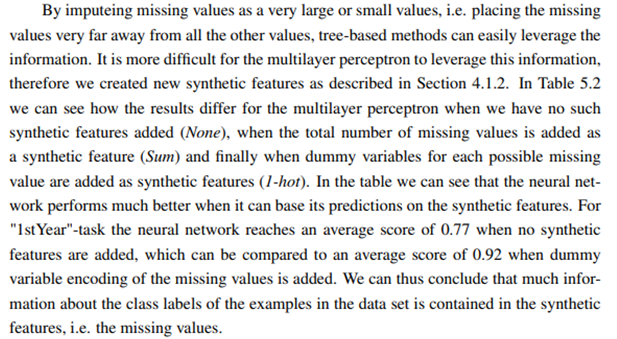

Mattson and Steinert had a control group, an MLP with no null data, and two experimental groups, an MLP with a sum variable (a variable that sums the number of null values in a row of data), and an MLP that that creates a dummy variable (1-hot) for each column with a null value (IE, X feature 1, 2, and 3 have corresponding missing dummy variables). Below are the AUC scores of the control and two experimental groups (Reference 7).

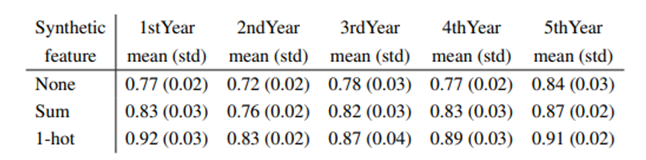

In [108]:
# This creates datasets with no_nulls.
NO_NULLS_year1 = clean_yr1.copy()
NO_NULLS_year2 = clean_yr2.copy()
NO_NULLS_year3 = clean_yr3.copy()
NO_NULLS_year4 = clean_yr4.copy()
NO_NULLS_year5 = clean_yr5.copy()

<a id='one-hot null'></a>
## Creation of One-hot Null Variables
This creates the null dummy variables (one-hot) for each column and a variable that counts the number of nulls per row.

In [109]:
# This creates the objects that will be the datasets
# with one-hot encoded variables for each X feature.
ONE_HOT_yr1 = clean_yr1.copy()
ONE_HOT_yr2 = clean_yr2.copy()
ONE_HOT_yr3 = clean_yr3.copy()
ONE_HOT_yr4 = clean_yr4.copy()
ONE_HOT_yr5 = clean_yr5.copy()

### Creation of X_missing
The X_missing variable is a dummy variable that signifies for a given column of X whether a row in the X column is missing (given a value of 1) or not (a value of 0).

In [110]:
# This creates the path needed to import functions from
# nulls.py.
null_path = ".."

In [111]:
# This changes the current working directory in order to import
# functions from nulls.py.
os.chdir(null_path)

# This imports the necessary functions from nulls.py.
from nulls import xnames_creator, missing_names_converter, actual_null_creator

# This creates the variable initial_xnames.
initial_xnames = xnames_creator()

# This creates the initial_xmissings variable.
initial_xmissings = missing_names_converter(initial_xnames)

### clean_yr1 x_missing

In [112]:
# This checks initial_xnames, which is necessary for 
# the creation of x_missings.
print(initial_xnames[0:5], initial_xnames[-5:])

['X1', 'X2', 'X3', 'X4', 'X5'] ['X60', 'X61', 'X62', 'X63', 'X64']


In [113]:
# This checks initial_xmissings. These are simply the names
# of the X_missing variables.
print(initial_xmissings[0:5], initial_xmissings[-5:])

['X1_missing', 'X2_missing', 'X3_missing', 'X4_missing', 'X5_missing'] ['X60_missing', 'X61_missing', 'X62_missing', 'X63_missing', 'X64_missing']


In [114]:
# This creates the dummy variables, X_missings for
# clean_yr1.
ONE_HOT_yr1 = actual_null_creator(ONE_HOT_yr1, initial_xnames, initial_xmissings)

In [115]:
# This determines whether the variables were created.
list(ONE_HOT_yr1.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [116]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
ONE_HOT_yr1['X4'].value_counts(dropna=False)

NaN             29
 1.247600        5
 1.517200        4
 1.302000        4
 1.245500        4
 1.558200        4
 1.760600        4
 1.114600        4
 1.240900        4
 1.812500        3
 1.176400        3
 1.766600        3
 1.746500        3
 1.271900        3
 1.069300        3
 1.655800        3
 1.420200        3
 1.064900        3
 1.212200        3
 1.066700        3
 1.576700        3
 1.032200        3
 1.606600        3
 1.225600        3
 1.021000        3
 1.555800        3
 1.003400        3
 1.200300        3
 1.355300        3
 1.276100        3
 2.049300        3
 1.133900        3
 1.261200        3
 2.046900        3
 1.453900        3
 1.238500        3
 1.353800        3
 1.389600        3
 1.538700        3
 1.200000        3
 1.107100        3
 1.076900        3
 1.930800        3
 1.025900        3
 1.242400        3
 1.111400        3
 2.080900        3
 1.717500        3
 1.831900        3
 1.016500        3
 2.137600        3
 1.255500        3
 1.160400   

In [117]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr1 were 29. The number of 1 values should
# also be 29.
ONE_HOT_yr1['X4_missing'].value_counts()

0    6916
1      29
Name: X4_missing, dtype: int64

### clean_yr1 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr2 x_missing:

In [118]:
# This creates the dummy variables, X_missings for
# clean_yr2.
ONE_HOT_yr2= actual_null_creator(ONE_HOT_yr2, initial_xnames, initial_xmissings)

In [119]:
# This determines whether the variables were created.
list(ONE_HOT_yr2.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [120]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
ONE_HOT_yr2['X4'].value_counts(dropna=False)

NaN             22
 1.300000        5
 1.627600        4
 1.433700        4
 1.178800        4
 1.035700        4
 1.074200        4
 1.039300        4
 1.311900        4
 1.171600        4
 1.110100        4
 1.316300        4
 1.387900        4
 1.154000        4
 1.066100        4
 1.084100        4
 1.279500        4
 1.188200        3
 1.465000        3
 1.067700        3
 1.337500        3
 1.271600        3
 1.052300        3
 1.202400        3
 1.248500        3
 1.394200        3
 1.359800        3
 2.544000        3
 1.328300        3
 1.281800        3
 1.320500        3
 1.609700        3
 1.017500        3
 1.182000        3
 2.017100        3
 1.343400        3
 1.170800        3
 1.963300        3
 1.188000        3
 1.408000        3
 1.275800        3
 1.043900        3
 1.289300        3
 1.227500        3
 1.651300        3
 1.332600        3
 1.135100        3
 2.159600        3
 1.375400        3
 1.309700        3
 2.521200        3
 1.061700        3
 1.445800   

In [121]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr2 were 22. The number of 1 values should
# also be 22.v
ONE_HOT_yr2['X4_missing'].value_counts()

0    10073
1       22
Name: X4_missing, dtype: int64

### clean_yr2 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr3 x_missing

In [122]:
# This creates the dummy variables, X_missings for
# clean_yr3.
ONE_HOT_yr3 = actual_null_creator(ONE_HOT_yr3, initial_xnames, initial_xmissings)

In [123]:
# This determines whether the variables were created.
list(ONE_HOT_yr3.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [124]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
ONE_HOT_yr3['X4'].value_counts(dropna=False)

NaN              18
 1.053500         4
 1.268500         4
 2.204700         4
 1.208100         4
 1.134400         4
 1.544600         4
 1.068400         4
 1.240900         4
 1.399200         4
 1.389600         4
 1.646100         4
 3.972700         4
 1.223000         4
 1.152000         4
 1.148200         4
 1.239300         4
 1.027100         3
 1.035100         3
 1.654700         3
 1.410000         3
 1.286400         3
 1.109000         3
 1.494000         3
 1.674100         3
 1.420000         3
 1.100500         3
 1.024700         3
 1.277200         3
 1.755200         3
 1.085500         3
 1.591800         3
 1.019700         3
 1.176200         3
 1.349300         3
 1.343100         3
 1.148600         3
 1.277700         3
 1.019100         3
 1.526200         3
 2.780200         3
 1.237400         3
 1.560800         3
 1.471100         3
 1.001400         3
 1.049400         3
 1.647000         3
 1.307900         3
 1.661000         3
 1.694000         3


In [125]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr3 were 18. The number of 1 values should
# also be 18.
ONE_HOT_yr3['X4_missing'].value_counts()

0    10410
1       18
Name: X4_missing, dtype: int64

### clean_yr3 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr4 x_missing

In [126]:
# This creates the dummy variables, X_missings for
# clean_yr4.
ONE_HOT_yr4 = actual_null_creator(ONE_HOT_yr4, initial_xnames, initial_xmissings)

In [127]:
# This determines whether the variables were created.
list(ONE_HOT_yr4.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [128]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
ONE_HOT_yr4['X4'].value_counts(dropna=False)

NaN              43
 1.482800         5
 1.211900         4
 1.700100         4
 1.381100         4
 1.245400         4
 1.071900         4
 1.465400         4
 1.728200         4
 1.051500         4
 1.159800         4
 1.026500         4
 1.485000         4
 1.067800         3
 1.849400         3
 1.041200         3
 1.245100         3
 1.037700         3
 2.172300         3
 1.184600         3
 1.112300         3
 1.185700         3
 1.528000         3
 1.509400         3
 1.869600         3
 1.126100         3
 1.130600         3
 4.331900         3
 2.029200         3
 1.129500         3
 1.050700         3
 1.168100         3
 1.152500         3
 2.219900         3
 1.841200         3
 1.174400         3
 1.108000         3
 1.618200         3
 1.322000         3
 1.776800         3
 1.455800         3
 1.948400         3
 1.520800         3
 1.000600         3
 1.136500         3
 1.162600         3
 1.103400         3
 1.573900         3
 1.125400         3
 1.184700         3


In [129]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr4 were 43. The number of 1 values should
# also be 43.
ONE_HOT_yr4['X4_missing'].value_counts()

0    9667
1      43
Name: X4_missing, dtype: int64

### clean_yr4 x_missing results:
The X_missing dummy variables were successfully created.

### clean_yr5 x_missing

In [130]:
# This creates the dummy variables, X_missings for
# clean_yr5.
ONE_HOT_yr5 = actual_null_creator(ONE_HOT_yr5, initial_xnames, initial_xmissings)

In [131]:
# This determines whether the variables were created.
list(ONE_HOT_yr5.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'X1_missing',
 'X2_missing',
 'X3_missing',
 'X4_missing',
 'X5_missing',
 'X6_missing',
 'X7_missing',
 'X8_missing',
 'X9_missing',
 'X10_missing',
 'X11_missing',
 'X12_missing',
 'X13_missing',
 'X14_missing',
 'X15_missing',
 'X16_missing',
 'X17_missing',
 'X18_missing',
 'X19_missing',
 'X20_missing',
 'X21_missing',
 'X22_missing',
 'X23_missing',
 'X24_missing',
 'X25_missing',
 'X26_missing',
 'X27_missing',
 'X28_missing',
 'X29_missing',
 'X30_missing',
 'X31_missing',
 'X32_miss

In [132]:
# This assesses the "NaN" values of "X4."
# This comes from Reference 6 in the References Section.
ONE_HOT_yr5['X4'].value_counts(dropna=False)

NaN             21
 1.665600        3
 1.769200        3
 1.047500        3
 1.939300        3
 1.047200        3
 1.285100        3
 1.385900        3
 1.153400        3
 1.167900        3
 1.150100        3
 1.200300        3
 1.045900        3
 1.107200        3
 1.713700        3
 1.509400        3
 1.034400        3
 1.629800        3
 1.029000        3
 1.007400        3
 1.434800        3
 1.642200        3
 1.390500        3
 3.219300        3
 1.041000        3
 1.794400        3
 1.542800        3
 2.338600        3
 3.736800        2
 1.218000        2
 2.158600        2
 1.072600        2
 2.672900        2
 1.090600        2
 1.379300        2
 0.360610        2
 1.822600        2
 1.086200        2
 1.600700        2
 1.938800        2
 1.326900        2
 1.145300        2
 2.069400        2
 1.255300        2
 1.435900        2
 1.316000        2
 1.517300        2
 1.324500        2
 1.306600        2
 1.779900        2
 1.651600        2
 1.308800        2
 1.030700   

In [133]:
# Notice that the number of "NaN" values for "X4"
# of clean_yr5 were 21. The number of 1 values should
# also be 21.
ONE_HOT_yr5['X4_missing'].value_counts()

0    5829
1      21
Name: X4_missing, dtype: int64

### clean_yr5 x_missing results:
The X_missing dummy variables were successfully created.

<a id='Creation of Sum Null Variables'></a>
## Creation of Sum Null Variables
This creates the sum null variables, which counts the number of nulls for each row of data.

In [134]:
# This creates the objects that will be the datasets
# with sum variables indicating the number of missing
# variables there are in each row of data.
SUM_yr1 = ONE_HOT_yr1.copy()
SUM_yr2 = ONE_HOT_yr2.copy()
SUM_yr3 = ONE_HOT_yr3.copy()
SUM_yr4 = ONE_HOT_yr4.copy()
SUM_yr5 = ONE_HOT_yr5.copy()

### clean_yr1 missing_count:


In [135]:
# This imports the missing_counter function from
# nulls.py.
from nulls import missing_counter

In [136]:
# This creates the 'missing_count' variable in 
# clean_yr_1.
SUM_yr1 = missing_counter(SUM_yr1)

In [137]:
# This determines whether 'missing_count'
# was successfully created in clean_yr_1.
SUM_yr1['missing_count'].value_counts(dropna = False)

0     3151
1     2659
2      841
3      164
4       48
5       28
6       14
15      10
7        8
14       7
8        6
13       3
9        2
40       1
20       1
33       1
19       1
Name: missing_count, dtype: int64

In [138]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr1.
SUM_yr1['missing_count'].dtype

dtype('int64')

In [139]:
# This drops the individiual x_missing variables.
SUM_yr1= SUM_yr1.drop(columns = initial_xmissings)

In [140]:
# This checks whether the individual x_missing
# variables were dropped.
list(SUM_yr1.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'missing_count']

### clean_yr1 missing_count results:
The missing count variable was successfully created.

### clean_yr2 missing_count:

In [141]:
# This creates the 'missing_count' variable in 
# clean_yr2.
SUM_yr2 = missing_counter(SUM_yr2)

In [142]:
# This determines whether 'missing_count'
# was successfully created in clean_yr2.
SUM_yr2['missing_count'].value_counts(dropna = False)

1     3321
2     2777
3     1220
22     726
21     722
23     344
4      328
5      185
24      85
7       77
6       73
25      48
8       32
9       25
26      21
10      21
27      12
29      10
28       9
18       7
17       6
36       6
37       5
16       5
19       4
20       3
13       3
31       2
44       2
30       2
38       2
40       2
15       2
11       1
34       1
35       1
45       1
14       1
56       1
54       1
39       1
Name: missing_count, dtype: int64

In [143]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr2.
SUM_yr2['missing_count'].dtype

dtype('int64')

In [144]:
# This drops the individiual x_missing variables.
SUM_yr2= SUM_yr2.drop(columns = initial_xmissings)

In [145]:
# This checks whether the individual x_missing
# variables were dropped.
list(SUM_yr2.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'missing_count']

### clean_yr2 missing_count results:
The missing count variable was successfully created.

### clean_yr3 missing_count:

In [146]:
# This creates the 'missing_count' variable in 
# clean_yr3.
SUM_yr3 = missing_counter(SUM_yr3)

In [147]:
# This determines whether 'missing_count'
# was successfully created in clean_yr3.
SUM_yr3['missing_count'].value_counts(dropna = False)

0     3823
1     3062
2     1617
3     1174
4      326
5      169
6       77
7       73
8       32
17      10
10      10
22       8
14       7
9        7
18       6
23       4
15       3
19       3
20       3
11       3
13       2
16       2
21       2
34       1
27       1
35       1
32       1
24       1
Name: missing_count, dtype: int64

In [148]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr4.
SUM_yr3['missing_count'].dtype

dtype('int64')

In [149]:
# This drops the individiual x_missing variables.
SUM_yr3= SUM_yr3.drop(columns = initial_xmissings)

In [150]:
# This checks whether the individual x_missing
# variables were dropped.
list(SUM_yr3.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'missing_count']

### clean_yr3 missing_count results:
The missing count variable was successfully created.

### clean_yr4 missing_count:

In [151]:
# This creates the 'missing_count' variable in 
# clean_yr4.
SUM_yr4 = missing_counter(SUM_yr4)

In [152]:
# This determines whether 'missing_count'
# was successfully created in clean_yr4.
SUM_yr4['missing_count'].value_counts(dropna = False)

2     4034
3     3027
25     686
26     624
4      437
5      277
27     140
7       92
6       85
28      52
9       44
8       37
29      27
30      23
10      21
31      14
12      12
32      12
16      10
33       8
11       6
34       6
19       5
20       5
17       3
13       3
14       3
15       3
18       2
23       2
21       2
24       1
41       1
43       1
35       1
50       1
22       1
42       1
36       1
Name: missing_count, dtype: int64

In [153]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr4.
SUM_yr4['missing_count'].dtype

dtype('int64')

In [154]:
# This drops the individiual x_missing variables.
SUM_yr4= SUM_yr4.drop(columns = initial_xmissings)

In [155]:
# This checks whether the individual x_missing
# variables were dropped.
list(SUM_yr4.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'missing_count']

### clean_yr4 missing_count results:
The missing count variable was successfully created.

### clean_yr5 missing_count:

In [156]:
# This creates the 'missing_count' variable in 
# clean_yr5.
SUM_yr5 = missing_counter(SUM_yr5)

In [157]:
# This determines whether 'missing_count'
# was successfully created in clean_yr5.
SUM_yr5['missing_count'].value_counts(dropna = False)

0     2995
1     2167
2      334
3      159
4       61
5       46
7       26
6       24
8       13
14       7
9        5
20       4
15       2
41       1
17       1
32       1
28       1
16       1
12       1
19       1
Name: missing_count, dtype: int64

In [158]:
# This determines whether the data type for 'missing_count'
# is in integer format in clean_yr5.
SUM_yr5['missing_count'].dtype

dtype('int64')

In [159]:
# This drops the individiual x_missing variables.
SUM_yr5= SUM_yr5.drop(columns = initial_xmissings)

In [160]:
# This checks whether the individual x_missing
# variables were dropped.
list(SUM_yr5.columns)

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41',
 'X42',
 'X43',
 'X44',
 'X45',
 'X46',
 'X47',
 'X48',
 'X49',
 'X50',
 'X51',
 'X52',
 'X53',
 'X54',
 'X55',
 'X56',
 'X57',
 'X58',
 'X59',
 'X60',
 'X61',
 'X62',
 'X63',
 'X64',
 'missing_count']

### clean_yr5 missing_count results:
The missing count variable was successfully created.

<a id='PIVOT'></a>
## PIVOT
The original solution for the original problem statement would have been to test several MLP algorithms with varying parameters and hyperparameters to determine whether modifications to the MLP algorithm can improve performance when compared to Mattson et al’s benchmark. However, the new solution is to create a new methodology and a new benchmark. The new methodology would do away with breaking down the datasets by year, and simply use the final year’s data as the testing data. The Udacity mentor who suggested this concept said:

>Typically, with time series data like this, we just use the first three years as the training data and the last as the testing data. Think about 'future' data here, as we couldn't do this for year 5 (future data). We need the testing set to be as similar as possible to 'real world' data as possible (Reference 20).

This analysis uses the concept described by the Udacity mentor, but it does not use data from year four as testing data, because year four does not have any rows of data that do not contain a null value (see Appendix C). However, this methodology is still feasible, because year 5 has 2,995 rows of data with no null values (see Appendix D) and these non-null rows will serve as the testing data. While the new methodology does away with breaking down the data into subsets by year, there will still be three versions of the dataset: the first has no null values, the second imputes null values and has a dummy variable for each X feature that signifies whether a value is null for that specific X feature (null = 1, non-null = 0), and the third imputes null values and has a single variable (“missing_counter”) that counts the number of null values in a given row (Reference 7). Finally, the benchmark model will be a simple logistic regression model, as suggested by the Udacity mentor in the first review of the analysis (Reference 20). An MLP with Mattson et al’s parameters and hyperparameters will be implemented and compared to the benchmark, and then these hyperparameters will be adjusted in another MLP model to determine whether the MLP performance can be further improved.


<a id='Data Reorganization'></a>
## Data Reorganization
This section reorganizes the datasets into three datasets. The first datset has no null values. The second dataset has dummy variables for each X feature identifying whether a value in the X feature is a null value (null = 1, non-null = 0). The third dataset has a variable ("missing_counter) that identifies the number of null values in a given row of data. The training data is the data from years 1-4, while the testing data is the year 5 data.

### No Nulls

In [161]:
## This concatenates the target variale to the NO_NULLS data for each of the five years.
NO_NULLS_year1['bankrupt'] = target_yr1
NO_NULLS_year2['bankrupt'] = target_yr2
NO_NULLS_year3['bankrupt'] = target_yr3
NO_NULLS_year4['bankrupt'] = target_yr4
NO_NULLS_year5['bankrupt'] = target_yr5

In [162]:
# This splits the testing and training data for NO_NULLS.

# This creates the "no nulls" testing dataset. 
NO_NULLS_testing_fulldataset = NO_NULLS_year5.dropna()

# This splits the testing data into X_test and Y_test data for the "no null"
# data.
NO_NULLS_y_test = NO_NULLS_testing_fulldataset['bankrupt']
NO_NULLS_x_test = NO_NULLS_testing_fulldataset.drop(columns='bankrupt')

# This creates the "no nulls" training dataset
# This code comes from Reference 21 from References..
NO_NULLS_full_training = pd.concat([NO_NULLS_year1,
                                  NO_NULLS_year2,
                                  NO_NULLS_year3,
                                  NO_NULLS_year4,
                                  NO_NULLS_year5])

# This drops the null values from the newly created training set.
NO_NULLS_full_training = NO_NULLS_full_training.dropna()

# This splits the training data into X_train and y_train data for the
# "no null" data.
NO_NULLS_y_train = NO_NULLS_full_training['bankrupt']
NO_NULLS_x_train = NO_NULLS_full_training.drop(columns='bankrupt')

# This concatenates the training and testing data for an exploratory dataset.
EXPLORE_no_nulls = pd.concat([NO_NULLS_full_training, NO_NULLS_testing_fulldataset])

### One-Hot

In [163]:
# This concatenates the target variale to the ONE_HOT data for each of the five years.
ONE_HOT_yr1['bankrupt'] = target_yr1
ONE_HOT_yr2['bankrupt'] = target_yr2
ONE_HOT_yr3['bankrupt'] = target_yr3
ONE_HOT_yr4['bankrupt'] = target_yr4
ONE_HOT_yr5['bankrupt'] = target_yr5

In [164]:
# This splits the testing and training data for "one hot".

# This creates the "ONE HOT" testing data. 
ONE_HOT_testing_fulldataset = ONE_HOT_yr5.dropna()

# This splits the testing data into X_test and Y_test data for the "ONE_HOT"
# data.
ONE_HOT_y_test = ONE_HOT_testing_fulldataset['bankrupt']
ONE_HOT_x_test = ONE_HOT_testing_fulldataset.drop(columns='bankrupt')

# This creates the "ONE_HOT" training dataset.
# This code comes from Reference 21 from References.
ONE_HOT_full_training = pd.concat([ONE_HOT_yr1,
                                  ONE_HOT_yr2,
                                  ONE_HOT_yr3,
                                  ONE_HOT_yr4,
                                  ONE_HOT_yr5])

# This splits the training data into X_train and y_train data for the
# "ONE_HOT" data.
ONE_HOT_y_train = ONE_HOT_full_training['bankrupt']
ONE_HOT_x_train = ONE_HOT_full_training.drop(columns='bankrupt')

# This concatenates the training and testing data for an exploratory dataset.
EXPLORE_one_hot = pd.concat([ONE_HOT_full_training, ONE_HOT_testing_fulldataset])

### Missing_Count

In [165]:
# This concatenates the target variale to the "Missing_Count"/"SUM" 
# data for each of the five years.
SUM_yr1['bankrupt'] = target_yr1
SUM_yr2['bankrupt'] = target_yr2
SUM_yr3['bankrupt'] = target_yr3
SUM_yr4['bankrupt'] = target_yr4
SUM_yr5['bankrupt'] = target_yr5

In [166]:
# This splits the testing and training data for "SUM".

# This creates the "SUM" testing data. 
SUM_testing_fulldataset = SUM_yr5.dropna()

# This splits the testing data into X_test and Y_test data for the "SUM"
# data.
SUM_y_test = SUM_testing_fulldataset['bankrupt']
SUM_x_test = SUM_testing_fulldataset.drop(columns='bankrupt')

# This creates the "SUM" training dataset.
# This code comes from Reference 21 from References.
SUM_full_training = pd.concat([SUM_yr1,
                                  SUM_yr2,
                                  SUM_yr3,
                                  SUM_yr4,
                                  SUM_yr5])

# This splits the training data into X_train and y_train data for the
# "SUM" data.
SUM_y_train = SUM_full_training['bankrupt']
SUM_x_train = SUM_full_training.drop(columns='bankrupt')

# This concatenates the training and testing data for an exploratory dataset.
EXPLORE_sum = pd.concat([SUM_full_training, SUM_testing_fulldataset])

<a id='Data Exploration - Descriptive Statistics'></a>
## Data Exploration - Descriptive Statistics
This sections peforms some descriptive statistics on the "no nulls", "one-hot", and "sum" datasets.

### Ranges and Standard Deviations for the X feature variables

In [167]:
# This imports range_funtion, which finds the ranges
# of each X feature in the N0_NULLS dataset.
from basic_stats import range_function
columns_list = list(EXPLORE_no_nulls.columns)

range_data = []
std_data =[]
for i in columns_list:
    x = range_function(EXPLORE_no_nulls[i])
    std = EXPLORE_no_nulls[i].std()
    range_data.append(x)
    std_data.append(std)

# This creates a dictionary that will be converted to a pandas dataframe.
range_dictionary = {'X_feature': columns_list, "Range": range_data,
                    "STD": std_data}

# This converts the dictionary to a pandas dataframe.
# It also creates a query that eliminates the bankruptcy
# variable.
describe_no_nulls = pd.DataFrame(range_dictionary)
describe_no_nulls = describe_no_nulls[(describe_no_nulls['X_feature'] != 'bankrupt')]

In [168]:
# This descirbes the range and the standard
# deviations for each of the X_features.
describe_no_nulls.describe()

,Range,STD
count,6.400000e+01,64.000000
mean,3.047262e+05,2868.882049
std,1.122045e+06,10797.648521
min,7.452960e+00,0.194611
25%,9.222710e+01,1.298771
50%,5.086104e+02,6.456352
75%,6.290943e+03,72.672198
max,6.248560e+06,62864.396234


In [169]:
# This imports range_funtion, which finds the ranges
# of each X feature in the ONE_HOT and SUM
# datasets.
from basic_stats import range_function
columns_list = list(EXPLORE_no_nulls.columns)

range_data = []
std_data =[]
for i in columns_list:
    x = range_function(EXPLORE_one_hot[i])
    std = EXPLORE_one_hot[i].std()
    range_data.append(x)
    std_data.append(std)

# This creates a dictionary that will be converted to a pandas dataframe.
range_dictionary = {'X_feature': columns_list, "Range": range_data,
                    "STD": std_data}

# This converts the dictionary to a pandas dataframe.
# It also creates a query that eliminates the bankruptcy
# variable.
describe_one_hot = pd.DataFrame(range_dictionary)
describe_one_hot = describe_one_hot[(describe_one_hot['X_feature'] != 'bankrupt')]

In [170]:
# This descirbes the range and the standard
# deviations for each of the X_features.
describe_one_hot.describe()

,Range,STD
count,6.400000e+01,64.000000
mean,2.601608e+06,13494.890583
std,6.699438e+06,33130.152192
min,1.058436e+01,0.822281
25%,1.785345e+03,14.084161
50%,2.270937e+04,117.553844
75%,2.938651e+05,1592.840968
max,3.050887e+07,142955.253916


### Variable Counts

In [171]:
# This finds the variable count for the "no nulls" dataset.
var_count_no_nulls = list(EXPLORE_no_nulls.columns)
len(var_count_no_nulls)

65

In [172]:
# This finds the variable count for the "one hot" dataset.
var_count_one_hot = list(EXPLORE_one_hot.columns)
len(var_count_one_hot)

129

In [173]:
# This finds the variable count for the "sum" dataset.
var_count_sum = list(EXPLORE_sum.columns)
len(var_count_sum)

66

### Row Counts

In [174]:
# This counts the number of rows in EXPLORE_no_nulls.
EXPLORE_no_nulls.shape[0]

12964

In [175]:
# This counts the number of rows in EXPLORE_one_hot.
EXPLORE_one_hot.shape[0]

46023

In [176]:
# This counts the number of rows in EXPLORE_sum.
EXPLORE_sum.shape[0]

46023

### Testing data as a percentage of the datasets.

In [177]:
# This determines the percentage size of the testing
# dataset out of the entire dataset for No Nulls.
test_perc_no_nulls = (NO_NULLS_testing_fulldataset.shape[0] /
                      EXPLORE_no_nulls.shape[0]) * 100
print("The percentage of the testing size out of the total dataset is: ",
      test_perc_no_nulls, "%." )

The percentage of the testing size out of the total dataset is:  23.102437519284173 %.


In [178]:
# This determines the percentage size of the testing
# dataset out of the entire dataset for No Nulls.
test_perc_one_hot = (ONE_HOT_testing_fulldataset.shape[0] /
                      EXPLORE_one_hot.shape[0]) * 100
print("The percentage of the testing size out of the total dataset is: ",
      test_perc_one_hot, "%." )

The percentage of the testing size out of the total dataset is:  6.507615757338722 %.


In [179]:
# This determines the percentage size of the testing
# dataset out of the entire dataset for No Nulls.
test_perc_sum = (SUM_testing_fulldataset.shape[0] /
                      EXPLORE_sum.shape[0]) * 100
print("The percentage of the testing size out of the total dataset is: ",
      test_perc_sum, "%." )

The percentage of the testing size out of the total dataset is:  6.507615757338722 %.


### Minority Class Analysis

In [180]:
# This querires the size of the bankrupt class in the NO NULLs
# dataset.
bankrupt_data = EXPLORE_no_nulls[(EXPLORE_no_nulls['bankrupt'] == 1)]
bankrupt_data.shape[0]

232

In [181]:
# This identifies what the minority class size is as a percentage
# of the total dataset.
minority_perc_no_nulls = (bankrupt_data.shape[0] / EXPLORE_no_nulls.shape[0]) * 100
print("The minority class size as a percentage of the total dataset is ",
     minority_perc_no_nulls, '%.')

The minority class size as a percentage of the total dataset is  1.7895711200246838 %.


In [182]:
# This querires the size of the bankrupt class of the SUM and
# ONE-HOT datasets
bankrupt_data_SUM = EXPLORE_sum[(EXPLORE_sum['bankrupt'] == 1)]
bankrupt_data_SUM.shape[0]

2184

In [183]:
# This identifies what the minority class size is as a percentage
# of the total dataset.
minority_perc_sum = (bankrupt_data_SUM.shape[0] / EXPLORE_sum.shape[0]) * 100
print("The minority class size as a percentage of the total dataset is ",
     minority_perc_sum, '%.')

The minority class size as a percentage of the total dataset is  4.745453360276383 %.


<a id='Exploratory Visualization'></a>
## Exploratory Visualization
This examines the effect of two X features on bankruptcy (true = 1, false = 0).The first X feature is X1, or Net Profit/Total Assets. This is a measure of how efficiently a company uses assets. Lower ratios should realize more bankruptcies while higher ratios should realize less bankruptcies. The second X feature is X10, or equity/total assets. This ratio shows how much a company depends upon debt financing (a highly leveraged company could go bankrupt because it is unable to pay its creditors). A lower ratio should realize more bankruptcies while a higher ratio should realize less bankruptcies. These two ratios are tested on the X features of both the no null dataset and the datasets that include nulls.

In [184]:
# This imports the necessary libraries for data visualization.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [185]:
# This creates the x1_plot and x_10 scatterplot functions
#for the visual analysis.

def x1_plot(the_data):
    '''
    This scatterplot plots Net Profit/Total Assets in the 
    X axis and Bankrupt (true = 1, false = 0) in the y-axis.
    '''
    # This adjust the figure size.
    # This comes from Reference 24 in References.
    plt.figure(figsize=(12.0, 4.0))

    # This creates the scatterplot.
    # This comes from Reference 1 in References.
    sns.scatterplot(x='X1', y='bankrupt', data = the_data)

    # This adds a title to the graph
    # and labels to the x and y axes.
    # This comes from Reference 23 in References.
    plt.title("The Effect of Net Profit/Total Assets on Bankruptcy")
    plt.xlabel('Net Profit/Total Assets Ratio')
    plt.ylabel('Bankrupt (True = 1, False = 0)')
    
def x10_plot(the_data):
    '''
    This scatterplot plots Equity/Total Assets in the 
    X axis and Bankrupt (true = 1, false = 0) in the y-axis.
    '''
    
    # This comes from Reference 24 in References.
    plt.figure(figsize=(12.0, 4.0))

    # This creates the scatterplot.
    # This comes from Reference 22 in References.
    sns.scatterplot(x='X10', y='bankrupt', data = the_data)

    # This adds a title to the graph
    # and labels to the x and y axes.
    # This comes from Reference 23 in References.
    plt.title("The Effect of Equity/Total Assets on Bankruptcy")
    plt.xlabel('Equity/Total Assets Ratio')
    plt.ylabel('Bankrupt (True = 1, False = 0)')

### No Nulls Dataset

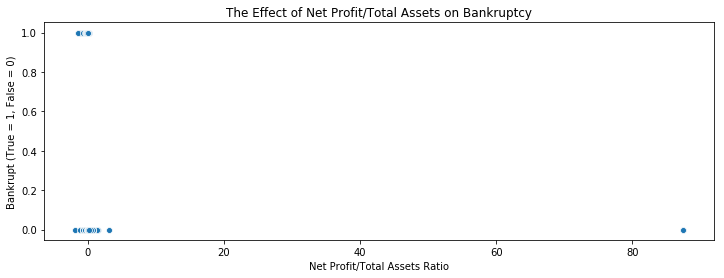

In [186]:
# This creates the plot with Net Profit/Total Assets in
# the x-axis and Bankrupt in the y-axis for the "No Nulls"
# dataset.
x1_plot(EXPLORE_no_nulls)

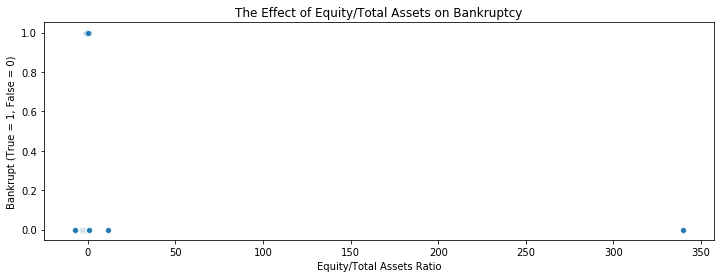

In [187]:
# This creates the plot with Equity/Total Assets in
# the x-axis and Bankrupt in the y-axis for the "No Nulls"
# dataset.
x10_plot(EXPLORE_no_nulls)

### Dataset With Nulls

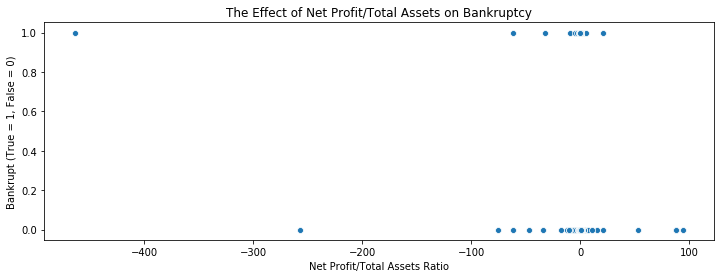

In [188]:
# This creates the plot with Net Profit/Total Assets in
# the x-axis and Bankrupt in the y-axis for the "SUM"
# dataset.
x1_plot(EXPLORE_sum)

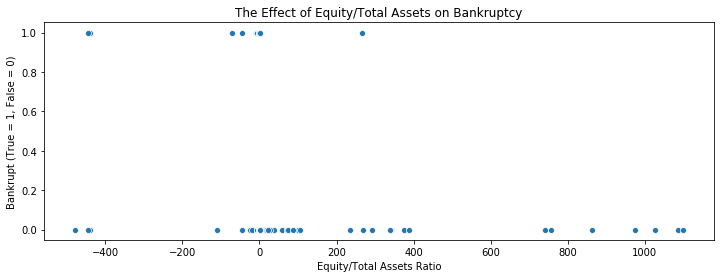

In [189]:
# This creates the plot with Equity/Total Assets in
# the x-axis and Bankrupt in the y-axis for the "SUM"
# dataset.
x10_plot(EXPLORE_sum)

<a id='Preprocessing'></a>
## Preprocessing
This section preprocesses the no nulls, the dummy variables, and missing counter datasets. First, for the dummy variables and the missing counter datasets, values are imputed for the null values. Next, feature scaling is applied to the data.  Finally, The training data for all three datasets are oversampled to remedy the data imbalance between the minority (bankrupt) and majority (not bankrupt) classes.

### Impute Null Values

In [190]:
# This imports the libraries that will impute the training data.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [191]:
## This imputes the ONE_HOT training data.
IMPUTER_one = IterativeImputer(random_state=42)
IMPUTER_one.fit(ONE_HOT_x_train)
IMPUTED_onehot_Xtrain = IMPUTER_one.transform(ONE_HOT_x_train)

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\impute\_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [192]:
# This imputes the SUM training data.
IMPUTER_sum = IterativeImputer(random_state=42)
IMPUTER_sum.fit(SUM_x_train)
IMPUTED_sum_Xtrain = IMPUTER_sum.transform(SUM_x_train)

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\sklearn\impute\_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


### Standardization

In [194]:
# This comes from Reference 10 from References
from sklearn.preprocessing import StandardScaler

# This standardizes the no nulls X_training data.
scaler_nonulls_Xtrain = StandardScaler()
scaler_nonulls_Xtrain.fit(NO_NULLS_x_train)
SCALED_nonulls_Xtrain = scaler_nonulls_Xtrain.transform(NO_NULLS_x_train)

# This standardizes the no nulls X_testing data.
scaler_nonulls_Xtest = StandardScaler()
scaler_nonulls_Xtest.fit(NO_NULLS_x_test)
SCALED_nonulls_Xtest = scaler_nonulls_Xtest.transform(NO_NULLS_x_test)

In [195]:
# This comes from Reference 10 from References

# This standardizes the ONE HOT X_training data.
# Note that the one hot training data has imputed values.
scaler_onehot_Xtrain = StandardScaler()
scaler_onehot_Xtrain.fit(IMPUTED_onehot_Xtrain)
SCALED_onehot_Xtrain = scaler_onehot_Xtrain.transform(IMPUTED_onehot_Xtrain)

# This standardizes the ONE HOT X_testing data.
# Note that the one hot testing dating does not have
# imputed values.
scaler_onehot_Xtest = StandardScaler()
scaler_onehot_Xtest.fit(ONE_HOT_x_test)
SCALED_onehot_Xtest = scaler_onehot_Xtest.transform(ONE_HOT_x_test)

In [196]:
# This comes from Reference 10 from References

# This standardizes the SUM X_training data.
# Note that the SUM training data has imputed values.
scaler_sum_Xtrain = StandardScaler()
scaler_sum_Xtrain.fit(IMPUTED_sum_Xtrain)
SCALED_sum_Xtrain = scaler_sum_Xtrain.transform(IMPUTED_sum_Xtrain)

# This standardizes the SUM X_testing data.
# Note that the one hot testing dating does not have
# imputed values.
scaler_sum_Xtest = StandardScaler()
scaler_sum_Xtest.fit(SUM_x_test)
SCALED_sum_Xtest = scaler_sum_Xtest.transform(SUM_x_test)

### Oversampling

In [197]:
# This imports the necessary library for oversampling.
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [198]:
# This oversamples the NO NULLS training set.
# This comes from Reference 25 in References.
SM_nonulls = SMOTE(random_state=42, ratio = 1.0)
OS_nonulls_Xtrain, OS_nonulls_Ytrain = SM_nonulls.fit_sample(
                SCALED_nonulls_Xtrain, NO_NULLS_y_train)

In [199]:
# This oversamples the ONE HOT training set.
# This comes from Reference 25 in References.
SM_onehot = SMOTE(random_state=42, ratio = 1.0)
OS_onehot_Xtrain, OS_onehot_Ytrain = SM_nonulls.fit_sample(
                SCALED_onehot_Xtrain, ONE_HOT_y_train)

In [200]:
np.unique(OS_onehot_Ytrain, return_counts=True)

(array([0, 1], dtype=int64), array([40945, 40945], dtype=int64))

In [201]:
# This oversamples the SUM training set.
# This comes from Reference 25 in References.
SM_sum = SMOTE(random_state=42, ratio = 1.0)
OS_sum_Xtrain, OS_sum_Ytrain = SM_nonulls.fit_sample(
                SCALED_sum_Xtrain, SUM_y_train)

### Preprocessed to CSV
This takes all the cleaned and preprocessed data and downloads them as CSVs. THIS SECTION IS NOT IN USE.

In [202]:

# This writes the no nulls data as a csv.

# This writes the null Xtraining data to a csv.
OS_nonulls_Xtrain = pd.DataFrame(OS_nonulls_Xtrain)
OS_nonulls_Xtrain.to_csv("no-peaking/Xtrain_nonulls.csv", index=False)

# This writes the null Xtraining data to a csv.
OS_nonulls_Ytrain = pd.DataFrame(OS_nonulls_Ytrain)
OS_nonulls_Ytrain.to_csv('no-peaking/Ytrain_nonulls.csv', index=False)

# This writes the null X and y testing data to a csv.
NO_NULLS_x_test.to_csv('no-peaking/Xtest_nonulls.csv', index=False)
NO_NULLS_y_test.to_csv('no-peaking/Ytest_nonulls.csv', index=False, header=True)


In [203]:

# This writes the ONE HOT data as a csv.

# This writes the ONE HOT Xtraining data as a csv.
OS_onehot_Xtrain = pd.DataFrame(OS_onehot_Xtrain)
OS_onehot_Xtrain.to_csv('no-peaking/Xtrain_onehot.csv', index=False)

# This writes the ONE HOT Ytraining data as a csv.
OS_onehot_Ytrain = pd.DataFrame(OS_onehot_Ytrain)
OS_onehot_Ytrain.to_csv('no-peaking/Ytrain_onehot.csv', index=False)

# This writes the ONEHOT x and y testing data to a csv.
ONE_HOT_x_test.to_csv('no-peaking/Xtest_onehot.csv', index=False)
ONE_HOT_y_test.to_csv("no-peaking/Ytest_onehot.csv", index=False, header=True)

In [204]:

# This writes the SUM data as a csv.

# This writes the SUM Xtraining data as a csv.
OS_sum_Xtrain = pd.DataFrame(OS_sum_Xtrain)
OS_sum_Xtrain.to_csv('no-peaking/Xtrain_sum.csv', index=False)

# This writes the SUM Ytraining data as a csv.
OS_sum_Ytrain = pd.DataFrame(OS_sum_Ytrain)
OS_sum_Ytrain.to_csv('no-peaking/Ytrain_sum.csv', index=False)

# This writes the SUM x and y testing data to a csv.
SUM_x_test.to_csv('no-peaking/Xtest_sum.csv', index=False)
SUM_y_test.to_csv('no-peaking/Ytest_sum.csv', index=False, header=True)


### Preparing Data for the Algorithms
This ensures that the data is clearly labled and in the correct format for the algorithms.

In [ ]:
'''
# This writes the no nulls data as a csv.

# This writes the null Xtraining data to a csv.
OS_nonulls_Xtrain = pd.DataFrame(OS_nonulls_Xtrain)
OS_nonulls_Xtrain.to_csv("no-peaking/Xtrain_nonulls.csv", index=False)

# This writes the null Xtraining data to a csv.
OS_nonulls_Ytrain = pd.DataFrame(OS_nonulls_Ytrain)
OS_nonulls_Ytrain.to_csv('no-peaking/Ytrain_nonulls.csv', index=False)

# This writes the null X and y testing data to a csv.
NO_NULLS_x_test.to_csv('no-peaking/Xtest_nonulls.csv', index=False)
NO_NULLS_y_test.to_csv('no-peaking/Ytest_nonulls.csv', index=False, header=True)
'''

In [ ]:
# This creates copies and relabels the no_nulls data.

# This creates Xtrain_nonulls and turns it into a np.array()
Xtrain_nonulls = OS_nonulls_Xtrain.copy()
Xtrain_nonulls = np.array(Xtrain_nonulls)
 
# This creates Xtest_nonulls and turns it into a np.array()
Xtest_nonulls = NO_NULLS_x_test.copy()
Xtest_nonulls = np.array(Xtest_nonulls)

# This creates Ytrain_nonulls and turns it into a np.array()
Ytrain_nonulls = OS_nonulls_Ytrain.copy()
Ytrain_nonulls = np.array(Ytrain_nonulls)

# This creates Ytest_nonulls and turns it into a np.array()
Ytest_nonulls = NO_NULLS_y_test.copy()
Ytest_nonulls = np.array(Ytest_nonulls)

In [ ]:
Xtrain_nonulls.shape

In [ ]:
Ytrain_nonulls.shape

In [ ]:
Xtest_nonulls.shape

In [ ]:
Ytest_nonulls.shape

In [ ]:

'''# This writes the ONE HOT data as a csv.

# This writes the ONE HOT Xtraining data as a csv.
OS_onehot_Xtrain = pd.DataFrame(OS_onehot_Xtrain)
OS_onehot_Xtrain.to_csv('data/Xtrain_onehot.csv', index=False)

# This writes the ONE HOT Ytraining data as a csv.
OS_onehot_Ytrain = pd.DataFrame(OS_onehot_Ytrain)
OS_onehot_Ytrain.to_csv('data/Ytrain_onehot.csv', index=False)

# This writes the ONEHOT x and y testing data to a csv.
ONE_HOT_x_test.to_csv('data/Xtest_onehot.csv', index=False)
ONE_HOT_y_test.to_csv("data/Ytest_onehot.csv", index=False, header=True)'''

In [ ]:
# This creates copies and relabels the ONEHOT data.

# This creates Xtrain_onehot and turns it into a np.array()
Xtrain_onehot = OS_onehot_Xtrain.copy()
Xtrain_onehot = np.array(Xtrain_onehot)

# This create Xtest_onehot and turns it into a np.array()
Xtest_onehot = ONE_HOT_x_test.copy()
Xtest_onehot = np.array(Xtest_onehot)

# This creates Ytrain_onehot and turns it into a np.array()
Ytrain_onehot = OS_onehot_Ytrain.copy()
Ytrain_onehot = np.array(Ytrain_onehot)

# This create Ytest_onehot and turns it into a np.array()
Ytest_onehot = ONE_HOT_y_test.copy()
Ytest_onehot = np.array(Ytest_onehot)

In [ ]:
Xtrain_onehot.shape

In [ ]:
Ytrain_onehot.shape

In [ ]:
Xtest_onehot.shape

In [ ]:
Ytest_onehot.shape

In [ ]:
'''
# This writes the SUM data as a csv.

# This writes the SUM Xtraining data as a csv.
OS_sum_Xtrain = pd.DataFrame(OS_sum_Xtrain)
OS_sum_Xtrain.to_csv('data/Xtrain_sum.csv', index=False)

# This writes the SUM Ytraining data as a csv.
OS_sum_Ytrain = pd.DataFrame(OS_sum_Ytrain)
OS_sum_Ytrain.to_csv('data/Ytrain_sum.csv', index=False)

# This writes the SUM x and y testing data to a csv.
SUM_x_test.to_csv('data/Xtest_sum.csv', index=False)
SUM_y_test.to_csv('data/Ytest_sum.csv', index=False, header=True)
'''

In [ ]:
    # This creates copies and relabels the SUM data.

# This creates Xtrain_sum and turns it into a np.array()
Xtrain_sum = OS_sum_Xtrain.copy()
Xtrain_sum = np.array(Xtrain_sum)

# This create Xtest_sum and turns it into a np.array()
Xtest_sum = SUM_x_test.copy()
Xtest_sum = np.array(Xtest_sum)

# This creates Ytrain_sum and turns it into a np.array()
Ytrain_sum = OS_sum_Ytrain.copy()
Ytrain_sum = np.array(Ytrain_sum)

# This create Ytest_sum and turns it into a np.array()
Ytest_sum = SUM_y_test.copy()
Ytest_sum = np.array(Ytest_sum)

In [ ]:
Xtrain_sum.shape

In [ ]:
Ytrain_sum.shape

In [ ]:
Xtest_sum.shape

In [ ]:
Ytest_sum.shape

<a id='Benchmark: Logistic Regression'></a>
## Benchmark: Logistic Regression

In [ ]:
# This imports the necessary libraries for the logistic regression models.
from sklearn.linear_model import LogisticRegressionCV

# This imports the AUC score for scoring the models.
# This comes from Reference 27 in References.
from sklearn.metrics import roc_auc_score

# This code is somewhat redundant. If the viewer didn't want to look at
# the full script and simply wanted to run the code here, this code
# imports the necessary libraries the analysis will need.
'''
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
'''

### Load Data

In [ ]:
'''
# This loads the no_nulls X training and testing data
# from the CSVs and converts the data to np.arrays.
Xtrain_nonulls = pd.read_csv('data/Xtrain_nonulls.csv')
Xtrain_nonulls = np.array(Xtrain_nonulls)
Xtest_nonulls = pd.read_csv('data/Xtest_nonulls.csv')
Xtest_nonulls = np.array(Xtest_nonulls)

# This loads the no_nulls Y training and testing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_nonulls = pd.read_csv('data/Ytrain_nonulls.csv')
Ytrain_nonulls = np.array(Ytrain_nonulls)
Ytrain_nonulls = Ytrain_nonulls.ravel() 
Ytest_nonulls = pd.read_csv('data/Ytest_nonulls.csv')
Ytest_nonulls = np.array(Ytest_nonulls)
Ytest_nonulls = Ytest_nonulls.ravel()
'''

In [ ]:
# This loads the ONE HOT X training and testing data
# from the CSVs.
Xtrain_onehot = pd.read_csv('data/Xtrain_onehot.csv')
Xtrain_onehot = np.array(Xtrain_onehot)
Xtest_onehot = pd.read_csv('data/Xtest_onehot.csv')
Xtest_onehot = np.array(Xtest_onehot)

# This loads the ONE HOT Y training and testing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_onehot = pd.read_csv('data/Ytrain_onehot.csv')
Ytrain_onehot = np.array(Ytrain_onehot)
Ytrain_onehot = Ytrain_onehot.ravel()
Ytest_onehot = pd.read_csv('data/Ytest_onehot.csv')
Ytest_onehot =np.array(Ytest_onehot)
Ytest_onehot = Ytest_onehot.ravel()

In [ ]:
# This loads the SUM X training and testing data
# from the CSVs.
Xtrain_sum = pd.read_csv('data/Xtrain_sum.csv')
Xtrain_sum = np.array(Xtrain_sum)
Xtest_sum = pd.read_csv('data/Xtest_sum.csv')
Xtest_sum = np.array(Xtest_sum)

# This loads the SUM Y training and testing data
# from the CSVs. It also ravels the y_data, so only 
# rows are shown, not columns.
Ytrain_sum = pd.read_csv('data/Ytrain_sum.csv')
Ytrain_sum = np.array(Ytrain_sum)
Ytrain_sum = Ytrain_sum.ravel()
Ytest_sum = pd.read_csv('data/Ytest_sum.csv')
Ytest_sum = np.array(Ytest_sum)
Ytest_sum = Ytest_sum.ravel()

## Running the model

In [ ]:
# This fits the Logistic Regression Model
# for the no nulls data.
# This model uses cross validation with 10 k-folds.
# This model also penalizes the X feature weights with
# 'l2' regularization.
# This model has a max iteration of 100.
# This comes from Reference 26 in References.
LogReg_nonulls = LogisticRegressionCV(cv=10, penalty='l2', max_iter=100)
LogReg_nonulls.fit(Xtrain_nonulls, Ytrain_nonulls)

# This predicts the y_values for the Logistic Regression Model
# for the no nulls data.
# This comes from Reference 26 in References.
PREDICTED_Ynonulls = LogReg_nonulls.predict(Xtest_nonulls)
AUCscore_LogReg_nonulls = roc_auc_score(Ytest_nonulls, PREDICTED_Ynonulls)

<a id='originalMLP'></a>
## Original MLP
Mattson and Steinert created an MLP with the following hyperparameters: a stochastic gradient descent loss optimizer, the use of the ReLU activation function on the input and hidden layers, the use of dropout (with 0.5 probability) on the input and hidden layers, L2 regularization on the weights (with a factor of 0.001), 100 hidden layers, 100 epochs, and a batch size of 50 (Reference 7). While the algorithm in this section attempts to replicate their MLP, there are a few hyperparameters that they did not specify in their research, such as the output of each hidden layer. While this algorithm uses their defined hyperparameters, the other hyperparemeters are set to my discretion. Also, I attempt to duplicate the results that they found with their MLP, which can be found in the top row of the table below.

This image comes from Reference 7 in References.

In [ ]:
# This imports the sequential model, the layers,
# the SGD optimizer, the regularizers from keras.
# This comes from Reference 13 in Referenes.
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers

# This imports checkpointer, which records the best weights
# for the algorithm.
# This comes from Reference 15 in References.
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
# This sets the original hyperparameters from Mattson and Steinert
# model.
# This comes from Reference 7 in References.
n_epochs = 100
size_of_batch = 50
stochastic = SGD()

# This imports the build_model function.
from MLP import build_model

# This builds the original MLP model for year 1.
# using Mattson and Steinart's original hyperparameters.
model_OG_year1 = build_model(drop_rate=0.5,
                            l2_factor=0.001,
                            hidden_act='relu',
                            out_act='sigmoid',
                            num_hidden=100,
                            in_dense=32,
                            hid_dense= 16,
                            x=X_1_oversampled)

In [ ]:
# This compiles the original MLP model for year 1.
# This is the binary output (bankrupt or not bankrupt) layer.
# This comes from Reference 13 in References.
model_OG_year1.compile(loss='binary_crossentropy',
              optimizer= stochastic,
              metrics=['accuracy'])

In [ ]:
# This creates checkpointer, which uses ModelCheckpoint to store the
# best weights of the model.
# This comes from References 15 & 16 in References.
checkpoint = ModelCheckpoint(filepath='saved_models/weights.best.model_OG_year1.hdf5',
                              monitor='val_accuracy', verbose=1, save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

In [ ]:
# This fits the model and runs it for 100 epochs.
model_OG_year1.fit(X_1_oversampled, y_1_oversampled, validation_split=0.2,
                epochs=n_epochs, batch_size=size_of_batch, 
                callbacks = callbacks_list, verbose=1)

In [ ]:
model_OG_year1.load_weights('saved_models/weights.best.model_OG_year1.hdf5')

<a id='references'></a>
## References

1. https://discuss.analyticsvidhya.com/t/how-to-display-full-dataframe-in-pandas/23298
2. https://github.com/brian-campbell-said-mba18/Udacity-DAND-Project-7-Dog-Tweet-Analysis/blob/master/wrangle_act.ipynb
3. https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
4. https://datatofish.com/convert-string-to-float-dataframe/
5. https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
6. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html
7. https://pdfs.semanticscholar.org/cd5f/aff7c02bcba0b3f7f438d4d1c38c3d30d43e.pdf
8. https://stackoverflow.com/questions/13610074/is-there-a-rule-of-thumb-for-how-to-divide-a-dataset-into-training-and-validatio
9. https://becominghuman.ai/demystifying-feature-scaling-baff53e9b3fd
10. https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/
11. https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18
12. https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
13. https://keras.io/getting-started/sequential-model-guide/
14. https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html
15. Udacity Machine Learning Engineer Nanodegree Program, Semester 2, Brian Campbell - Dog Breed Classifier Project
16. https://machinelearningmastery.com/check-point-deep-learning-models-keras/
17. https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data
18. https://machinelearningmastery.com/data-leakage-machine-learning/
19. https://stats.stackexchange.com/questions/301350/imputing-missing-values-on-a-testing-set [Accessed 6 Nov. 2019].
20. Udacity Mentor Review # 1. (2019). Capstone Project: The Efficacy of Multilayer Perceptron Algorithms in Predicting Bankruptcy.
21. https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
22. https://seaborn.pydata.org/generated/seaborn.scatterplot.html
23. Udacity Data Analyst Nanodegree, Semester 1, Brian Campbell – Project 3, Determining Factors that Correlate to Movie Profitability
24. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
25. https://beckernick.github.io/oversampling-modeling/
26. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
27. https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras